In [ ]:
!nvidia-smi

Sun Sep 14 16:57:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9kd6fSXSgGKGfplR7dpa")
project = rf.workspace("polyp-e78ji").project("polyp-kntak-16nos")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/drive/MyDrive/polypdetectionv8/train/images/polyp-1-_jpg.rf.46127f2a308ca1564de883c8e1bd325a.jpg'

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/drive/MyDrive/polypdetectionv8/train/images/polyp-1-_jpg.rf.46127f2a308ca1564de883c8e1bd325a.jpg: 640x640 (no detections), 8.1ms
Speed: 8.6ms preprocess, 8.1ms inference, 98.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
dataset.location

'/content/polyp-3'

**CUSTOM DATA TRAINING**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/polyp-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

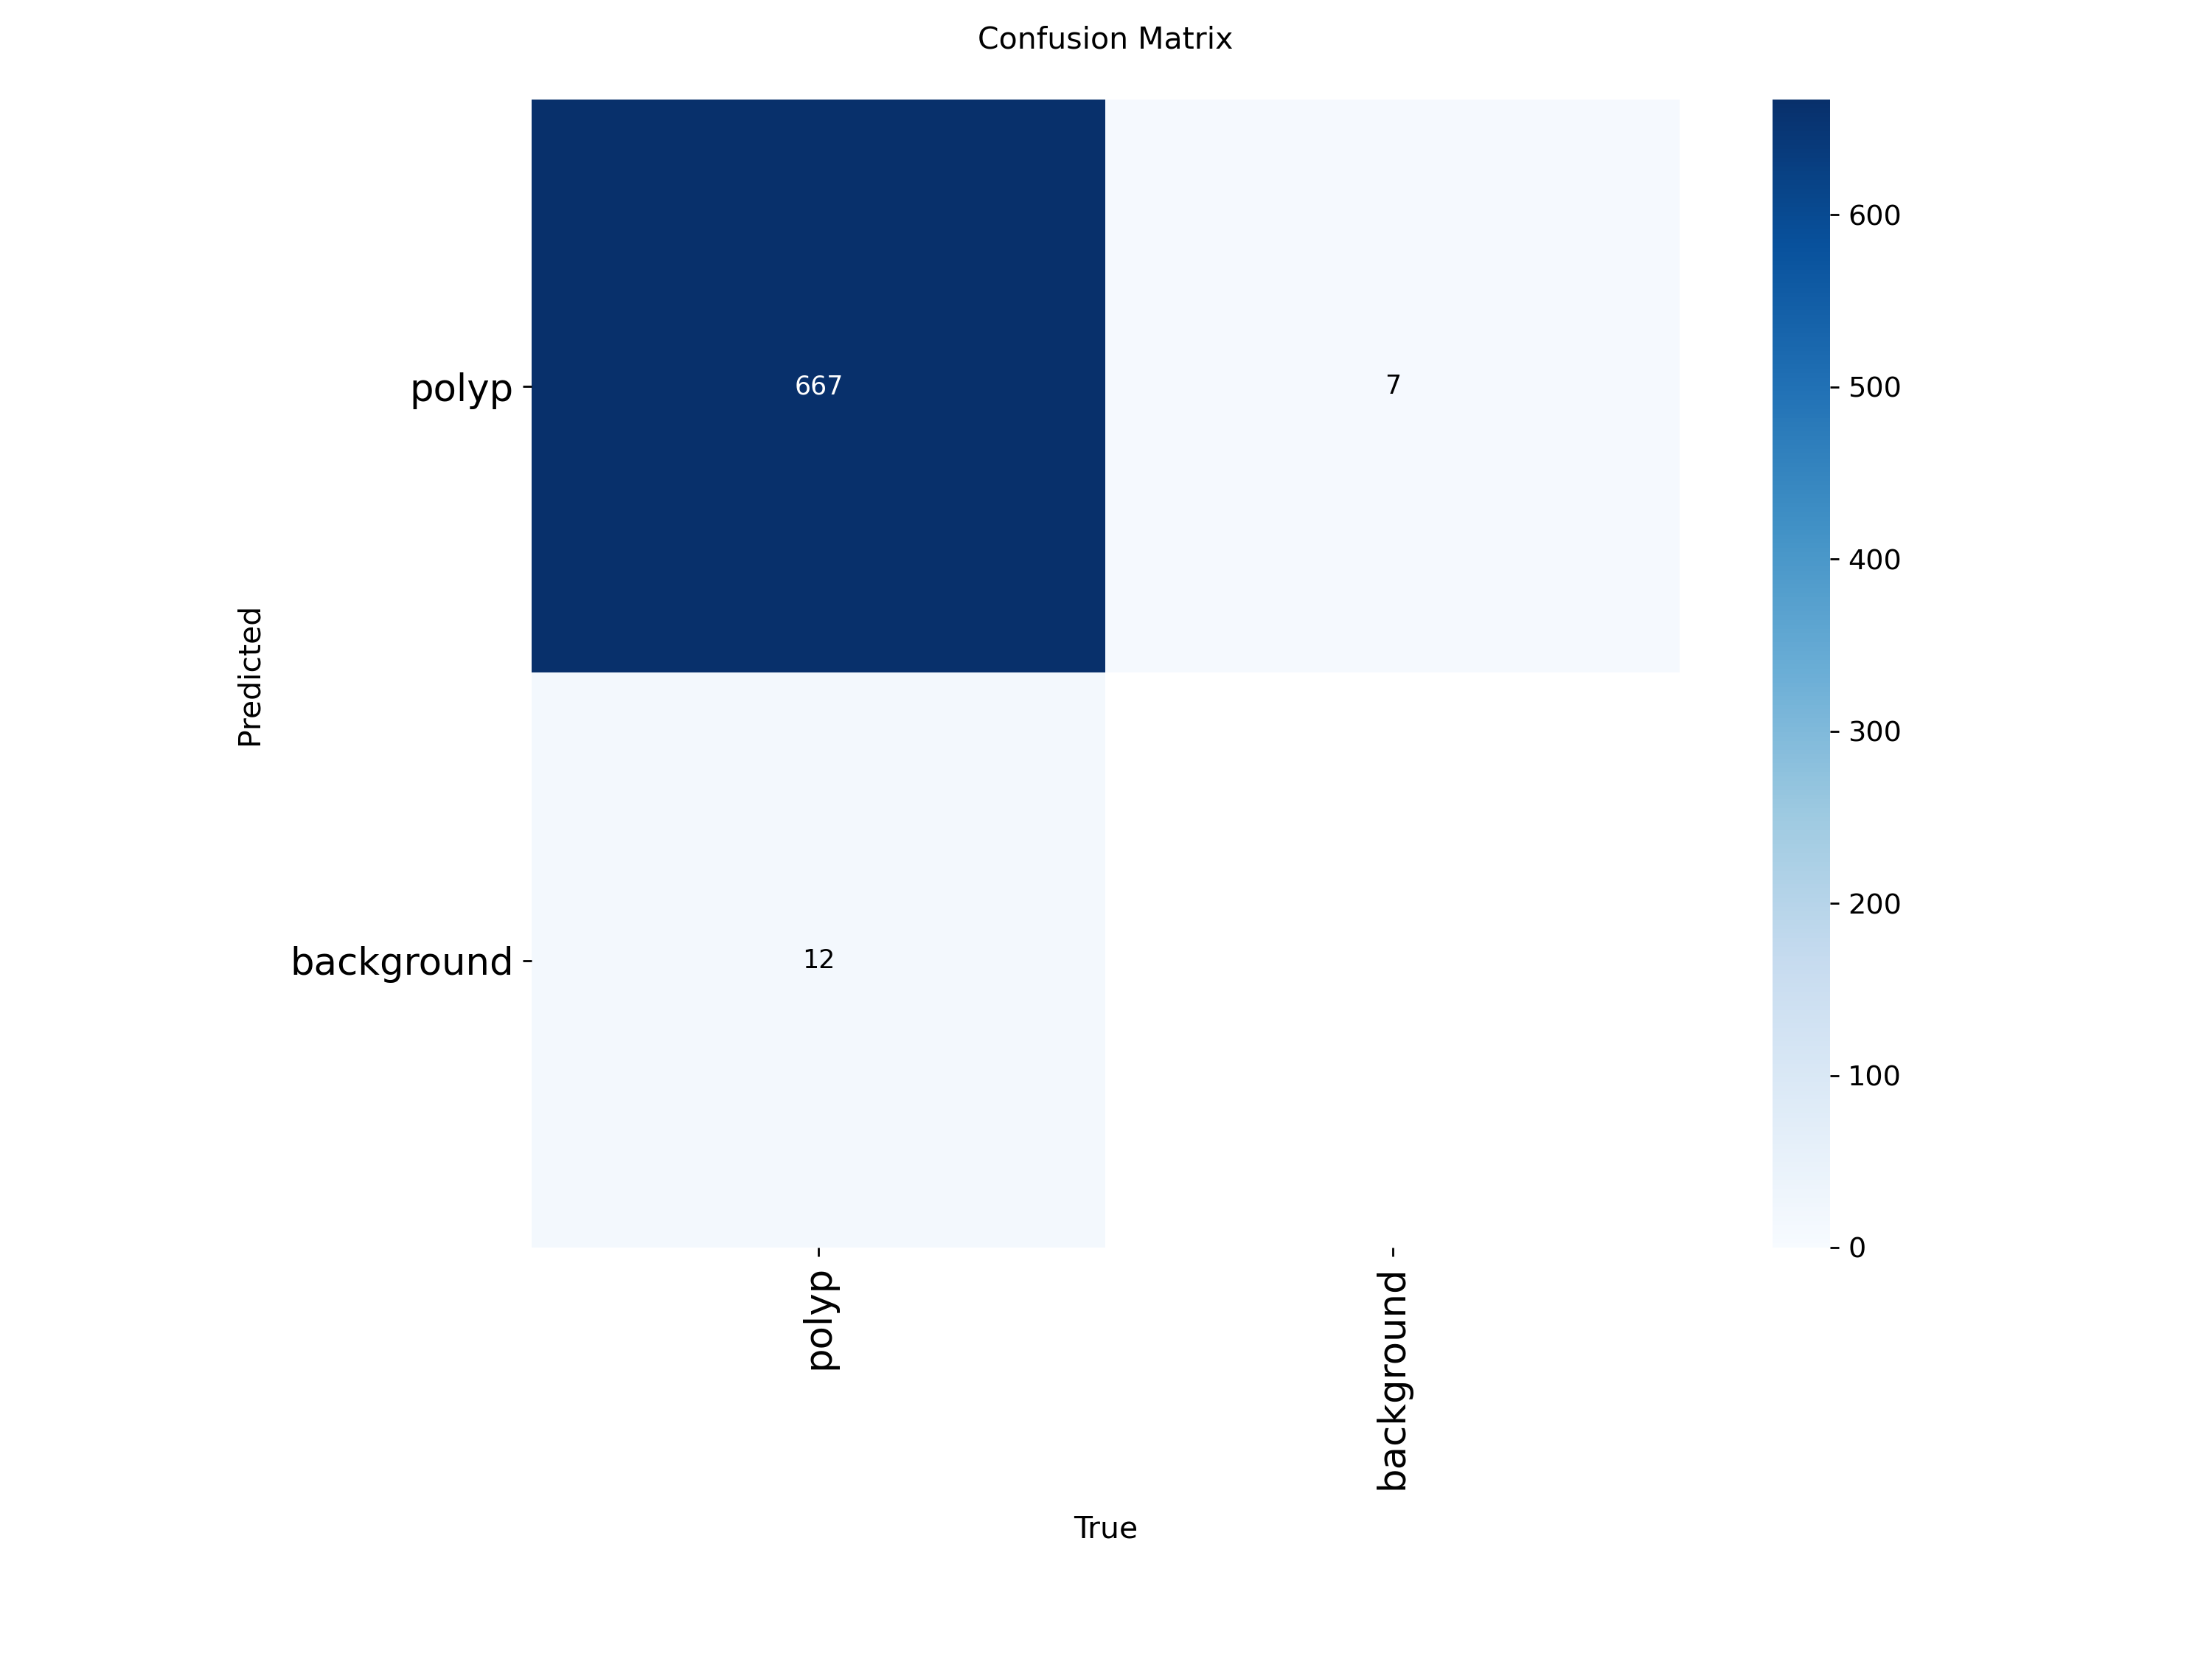

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

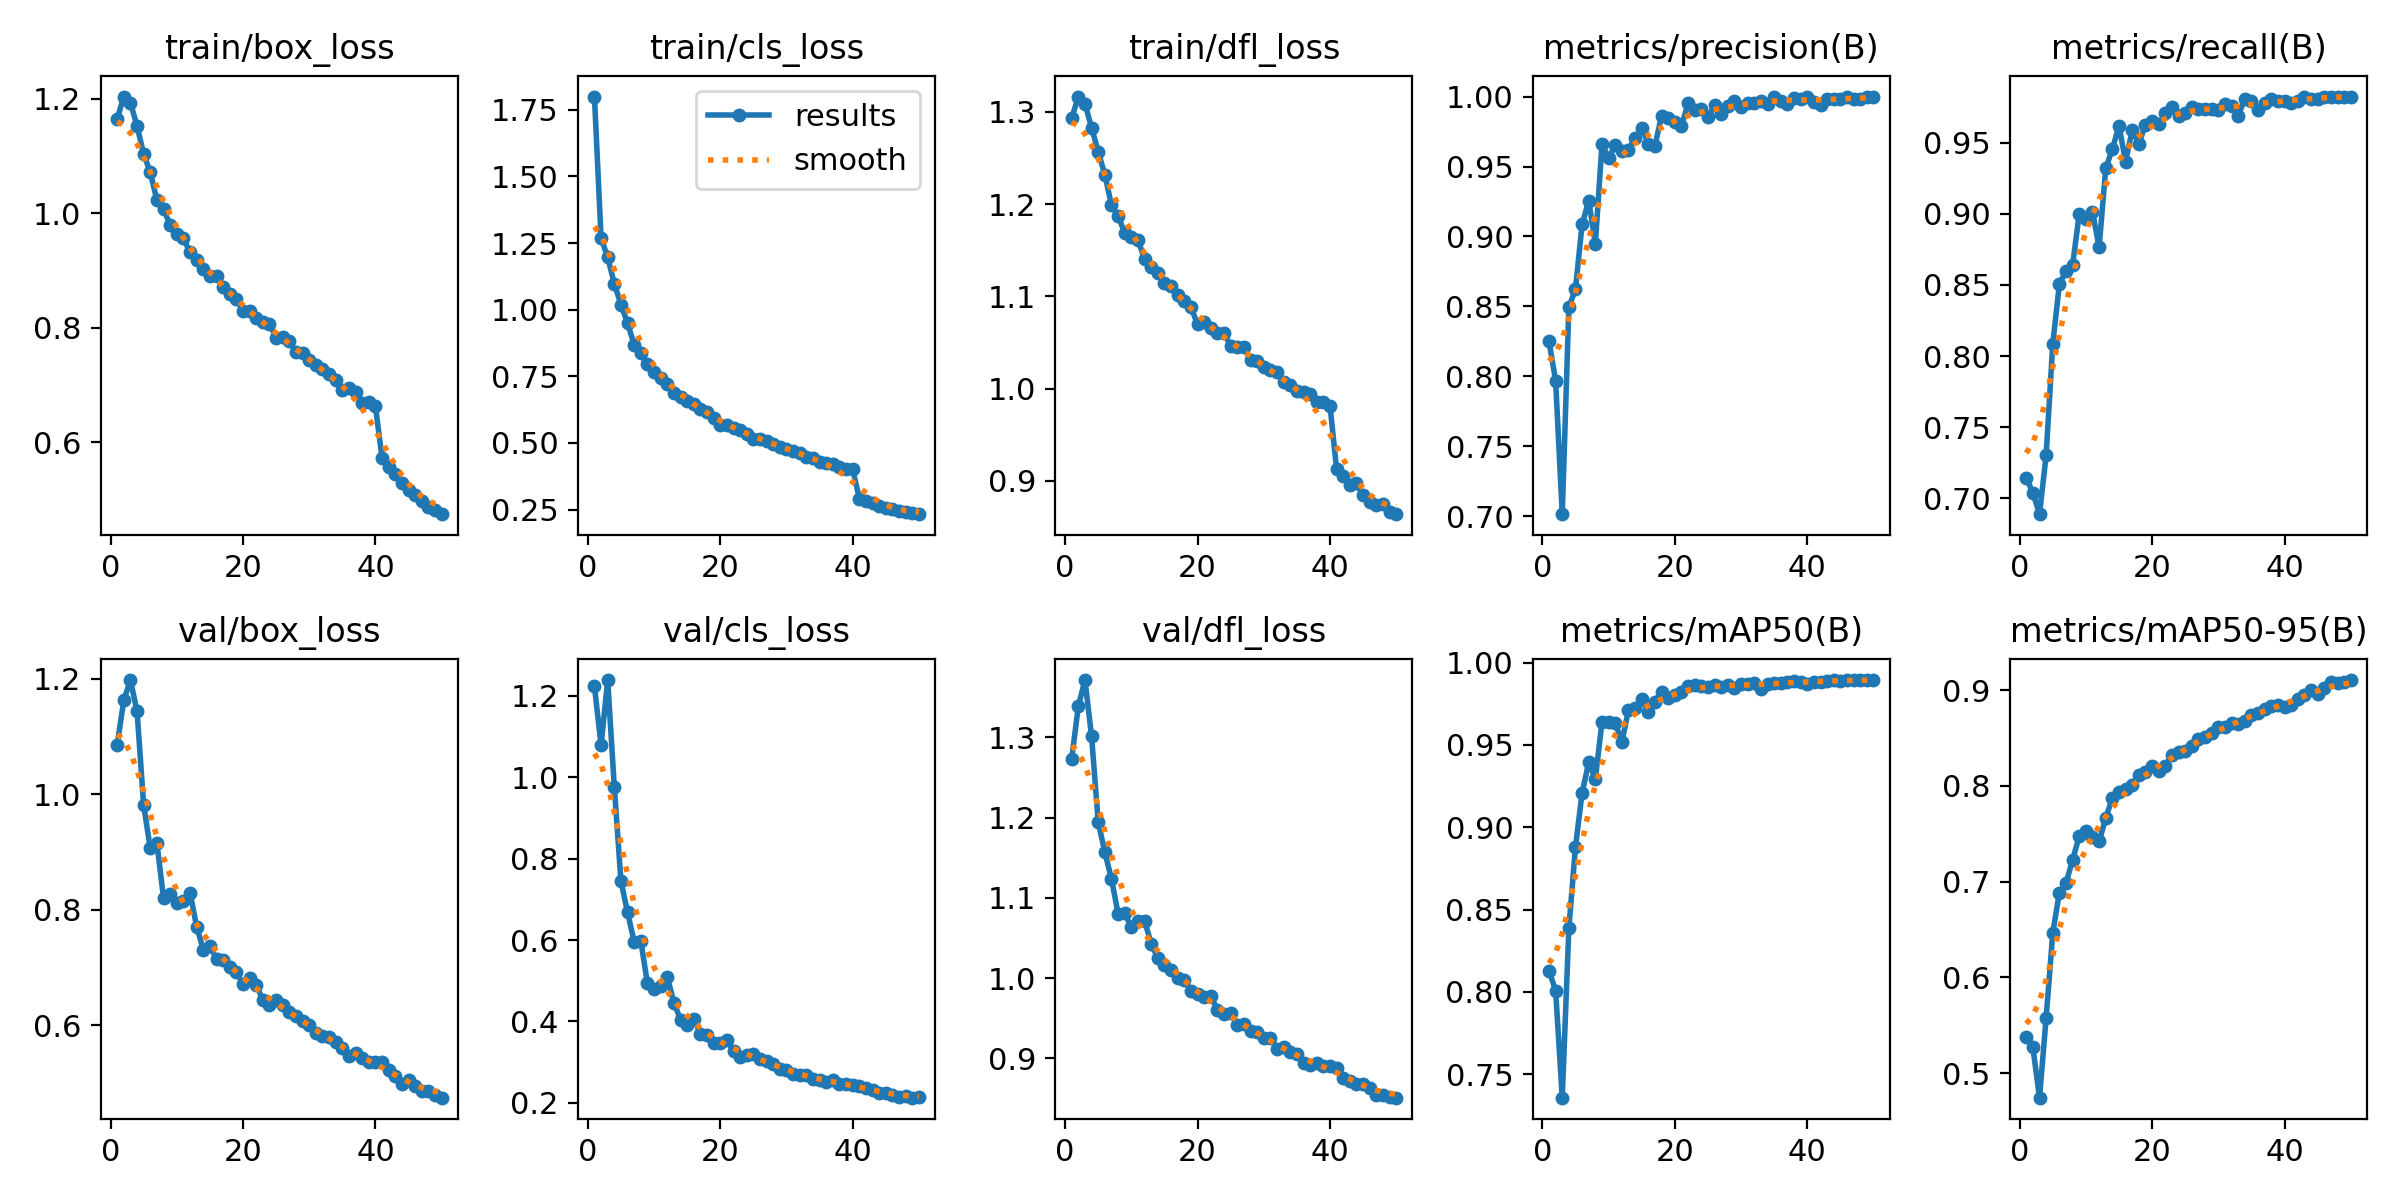

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/results.png", width=1000)

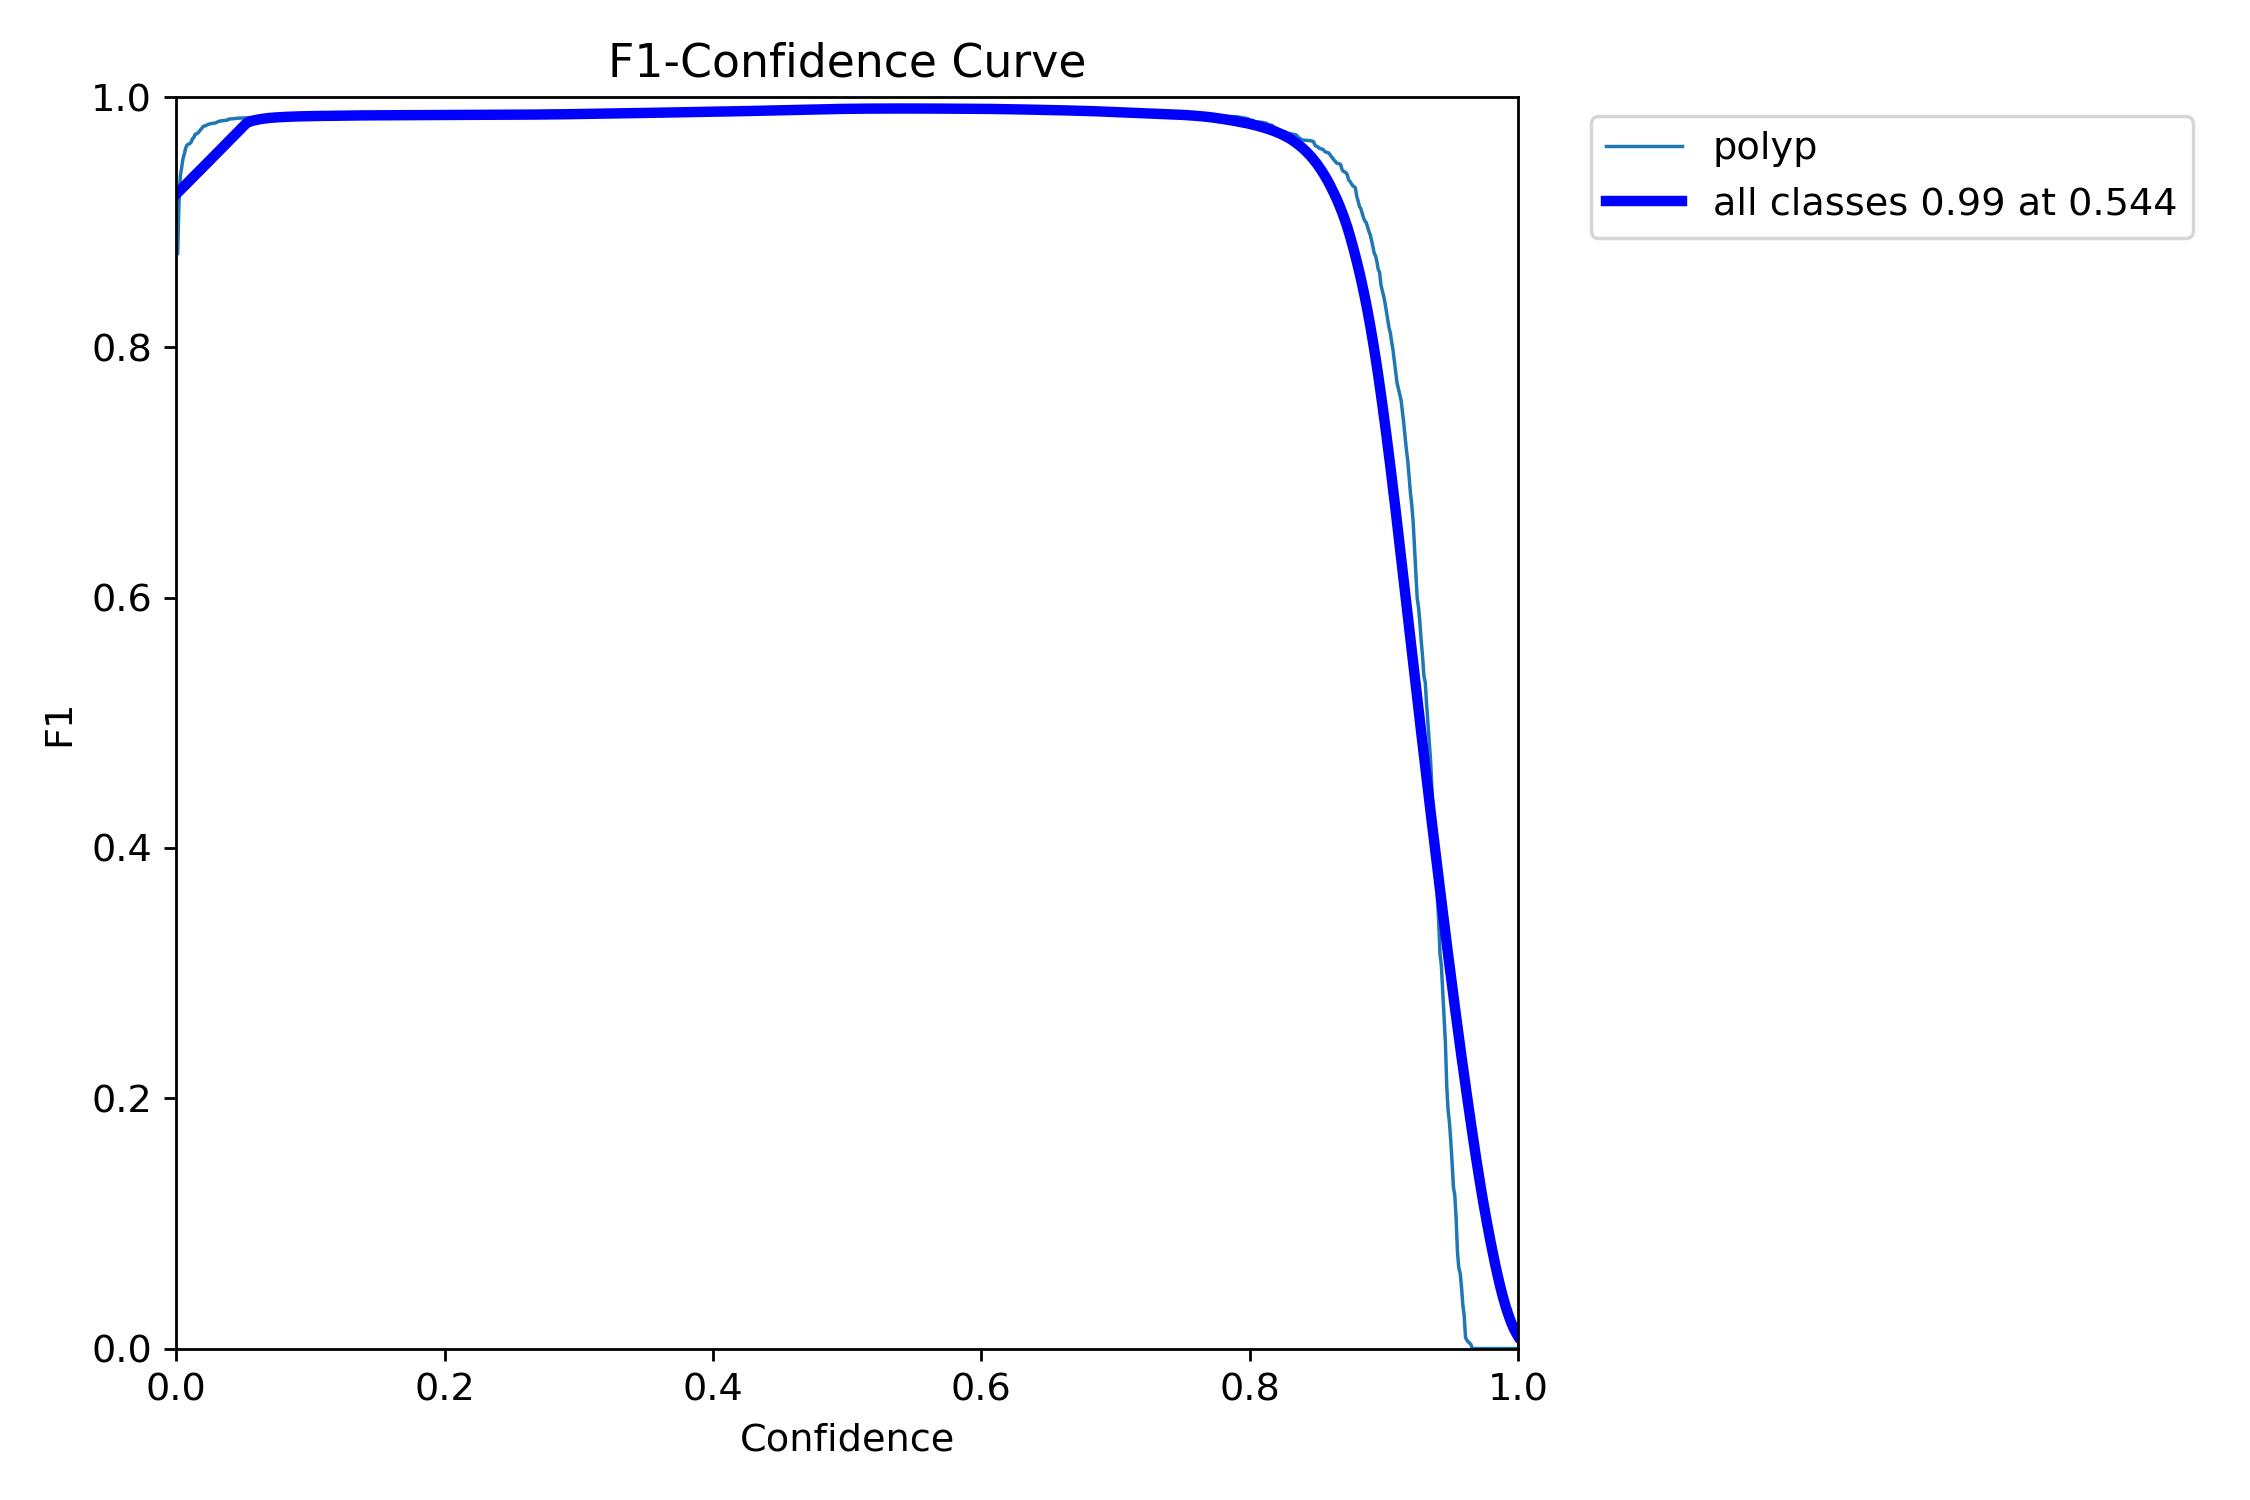

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/BoxF1_curve.png", width=1000)

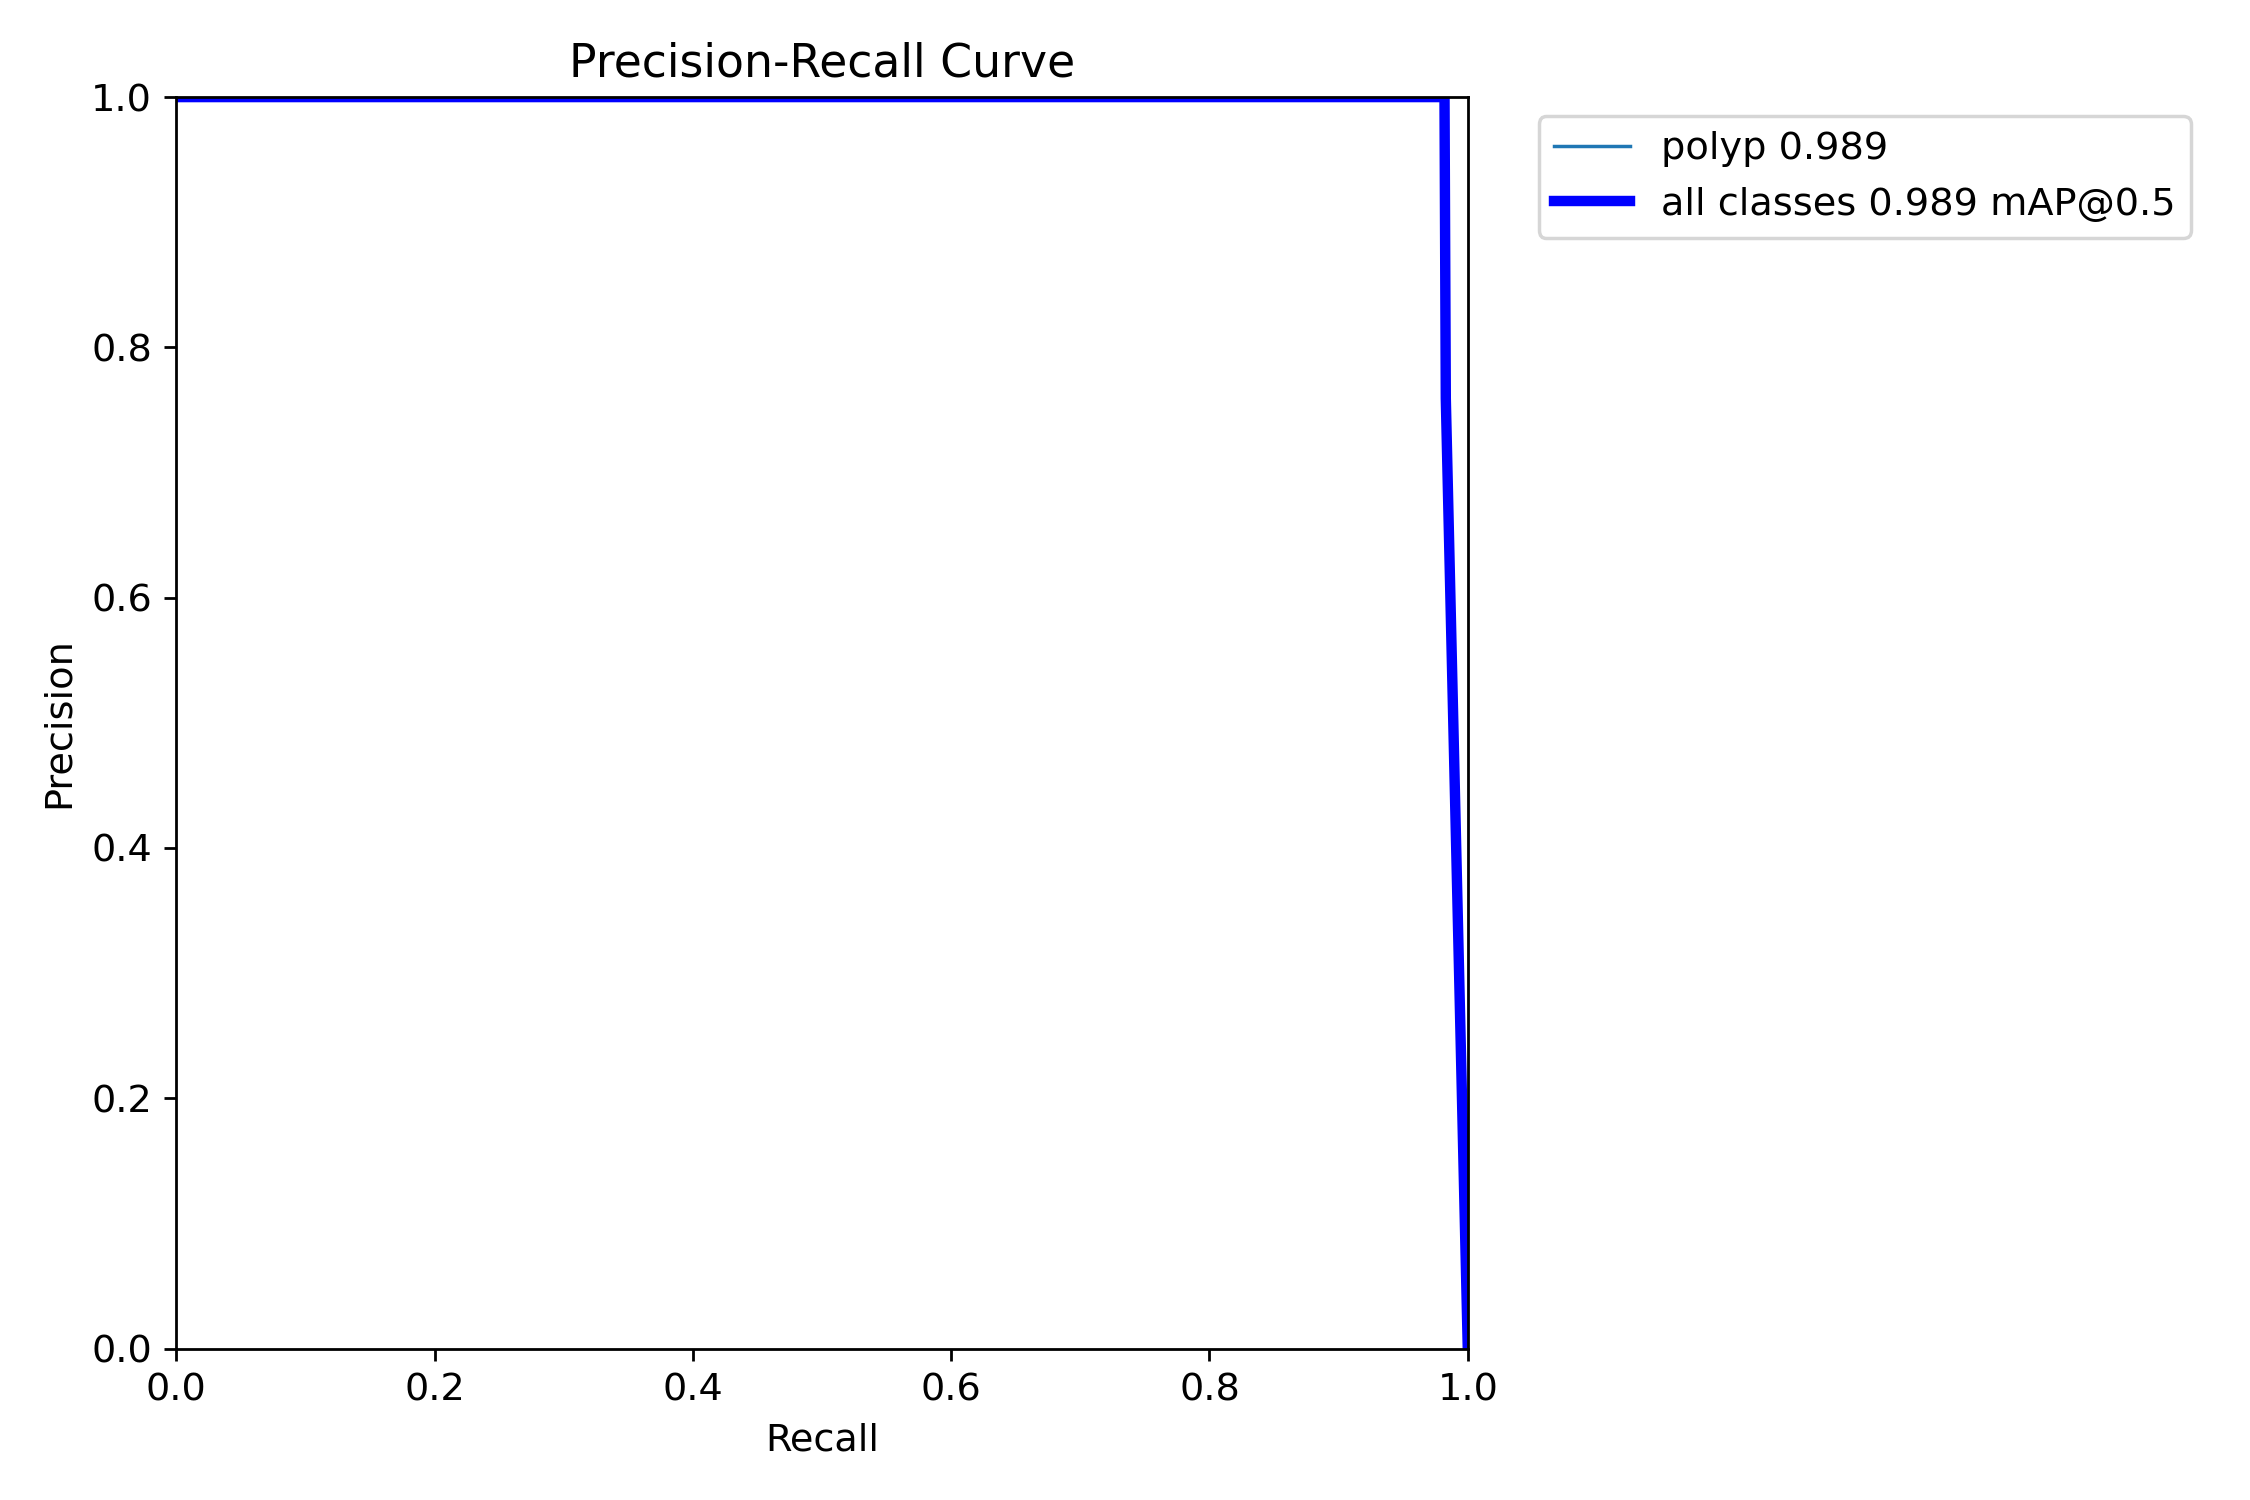

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/BoxPR_curve.png", width=1000)

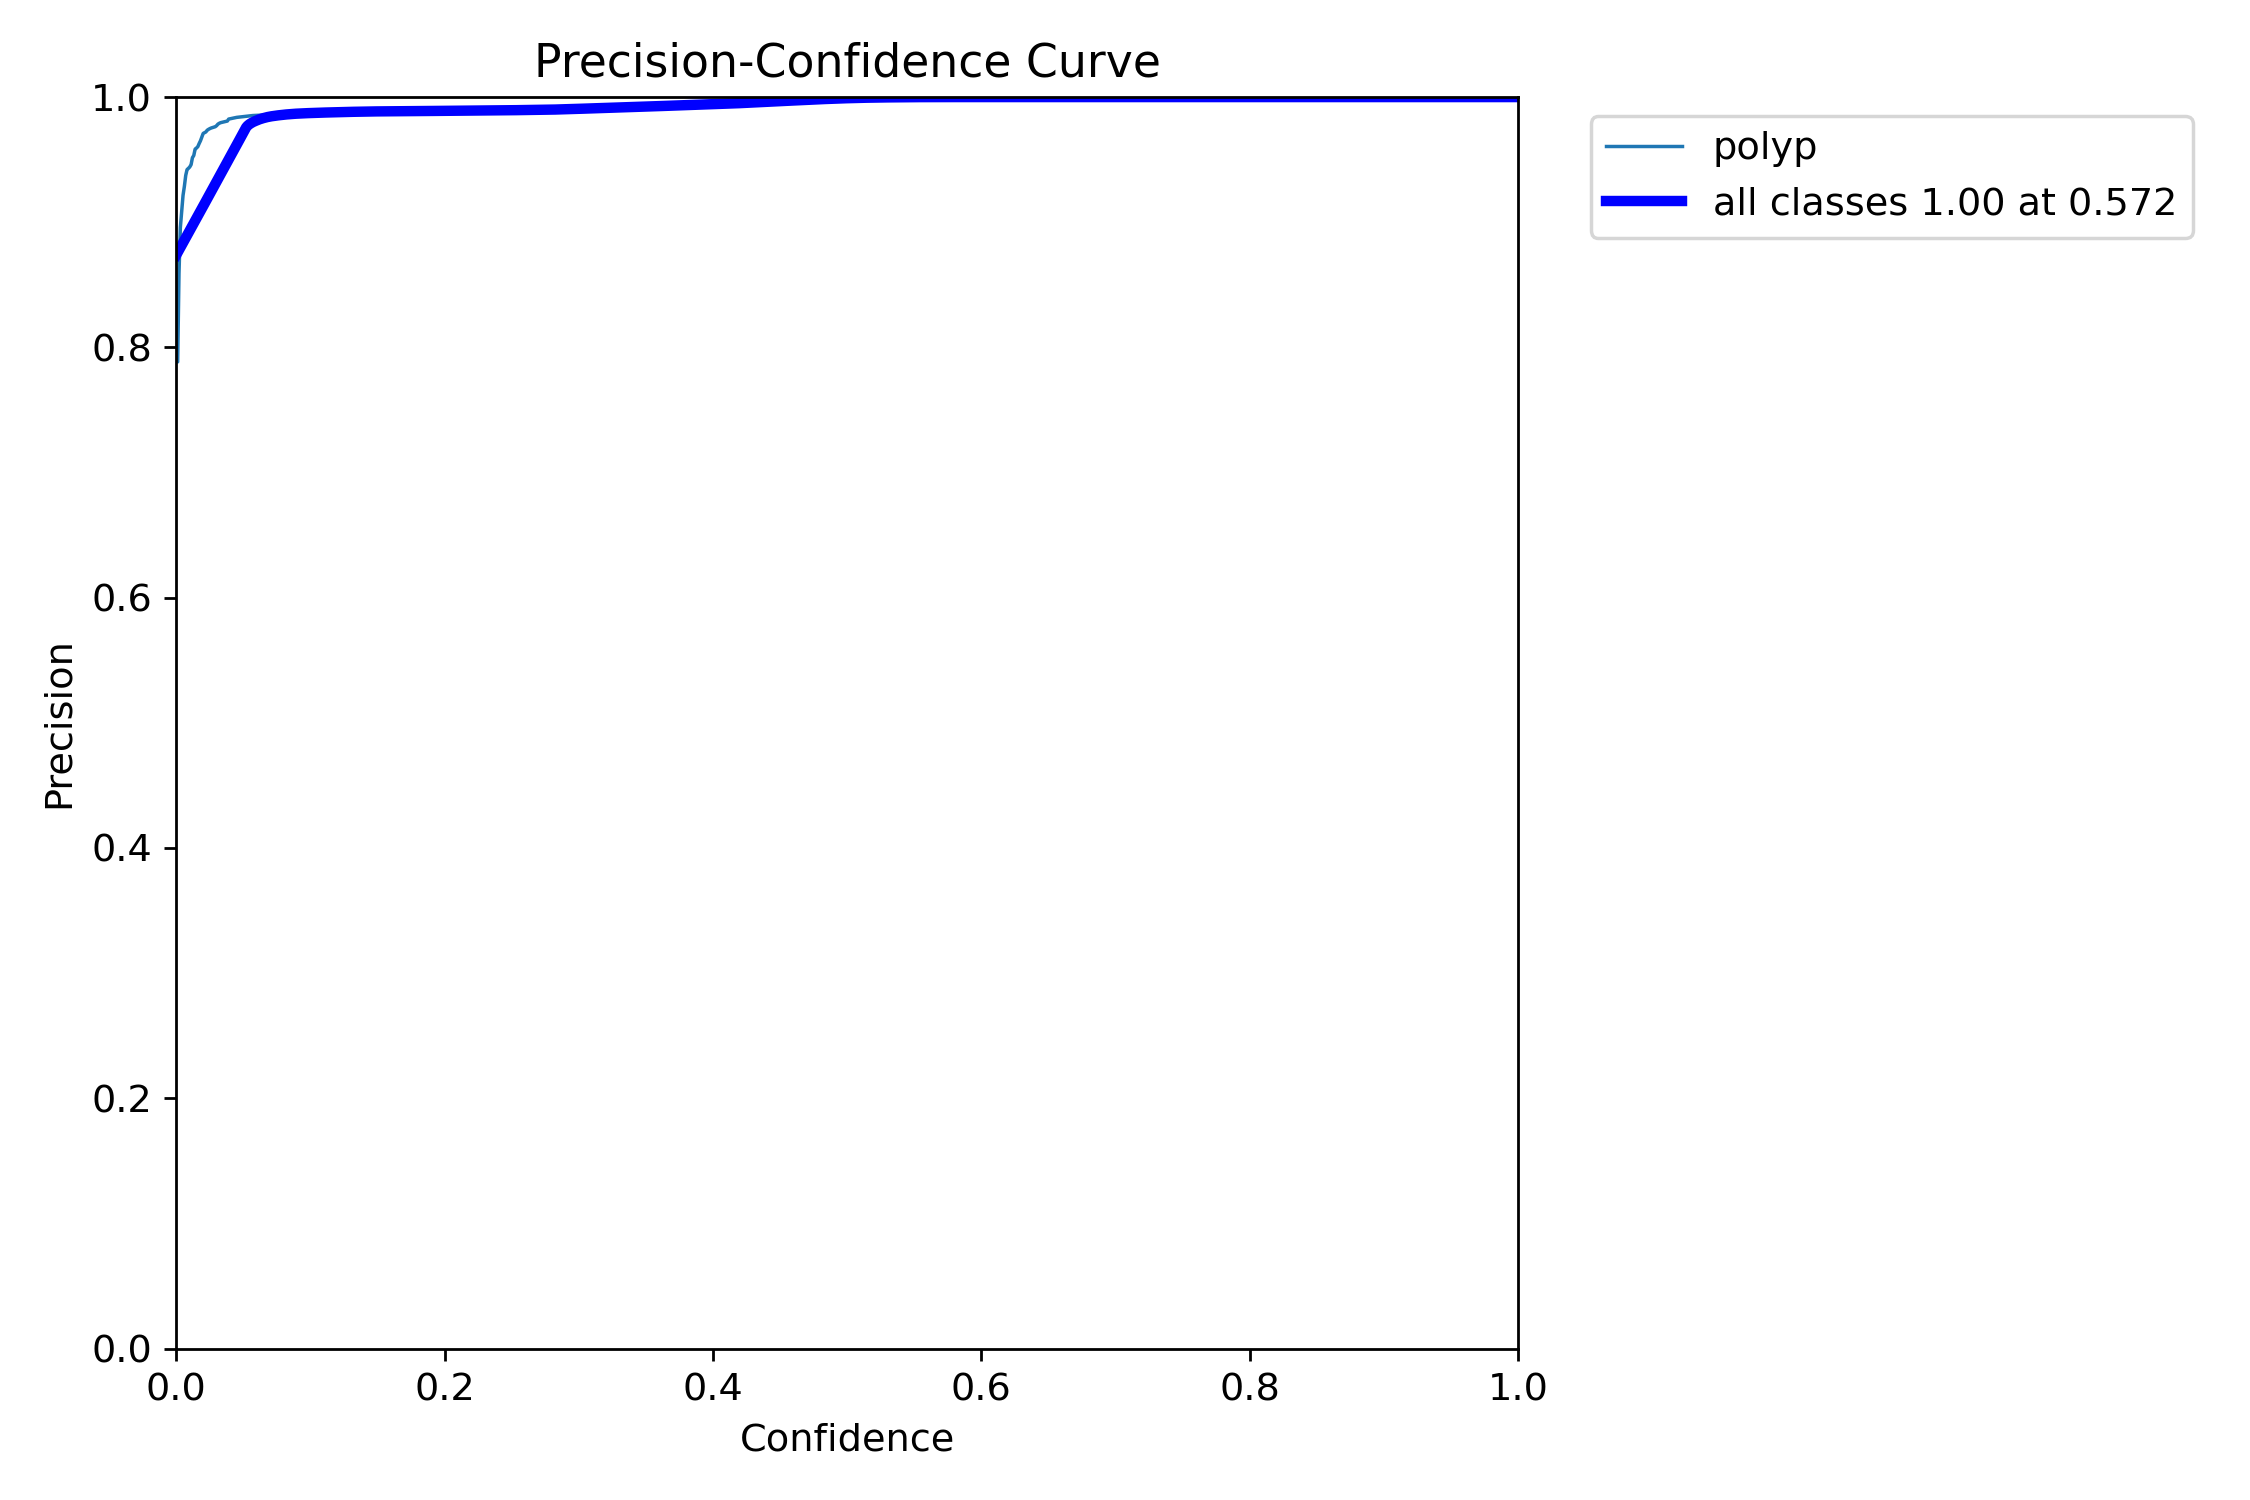

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/BoxP_curve.png", width=1000)

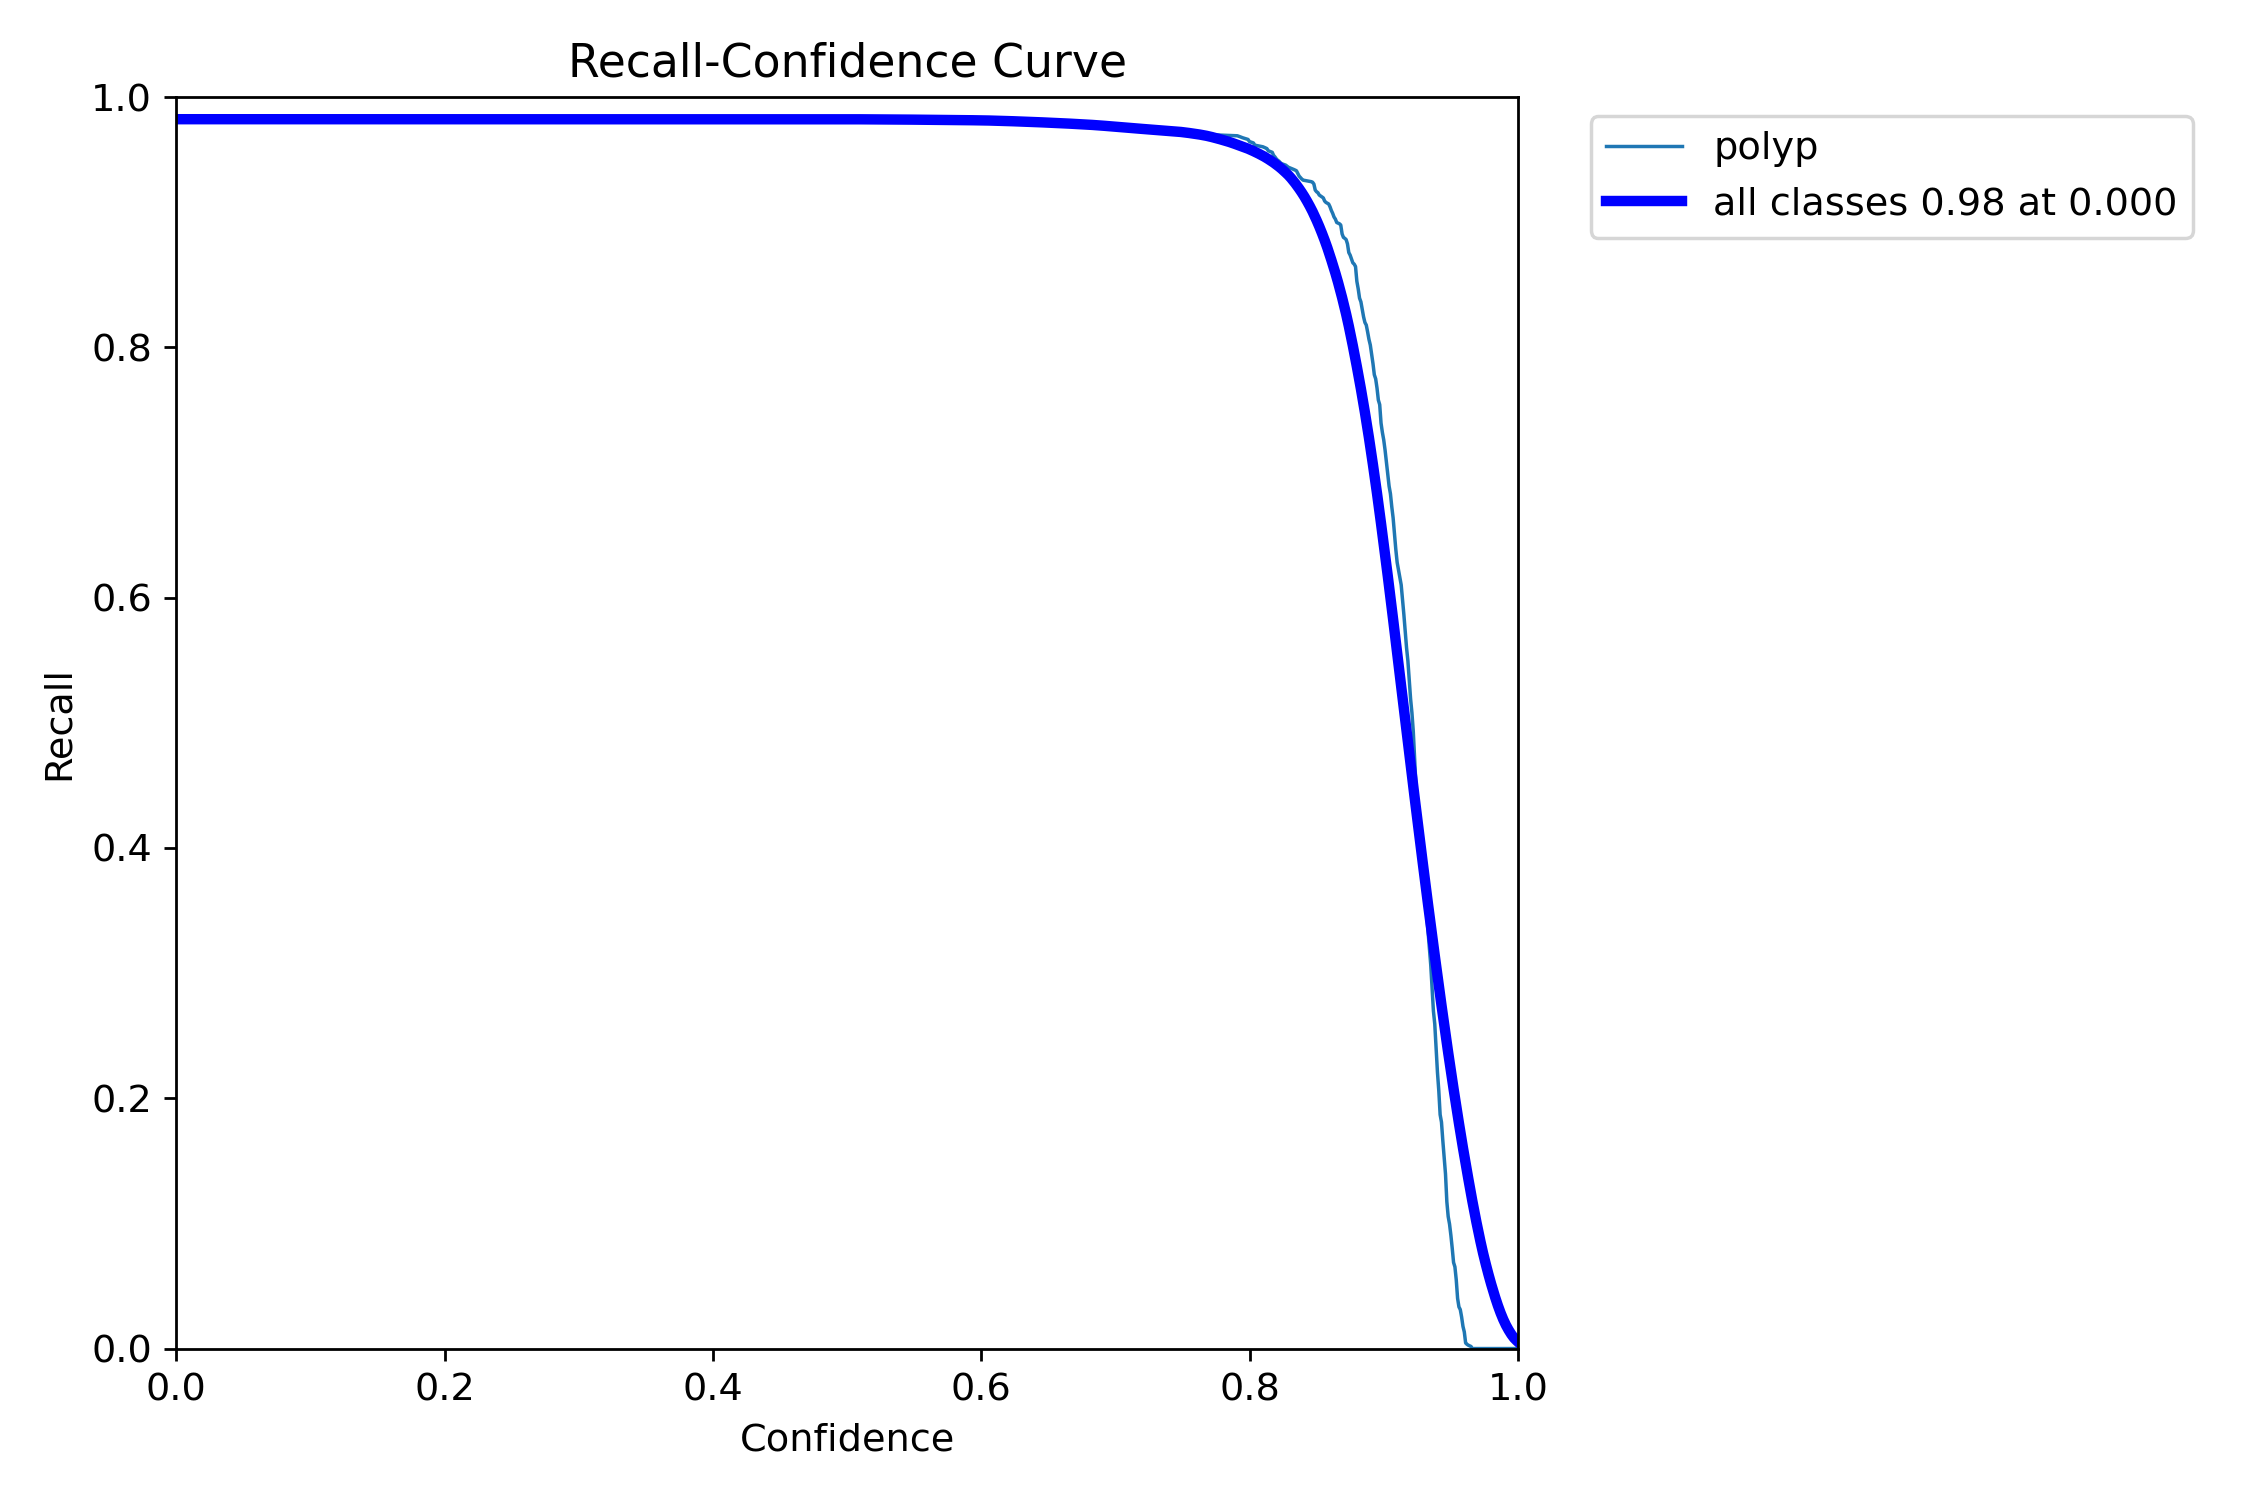

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/BoxR_curve.png", width=1000)

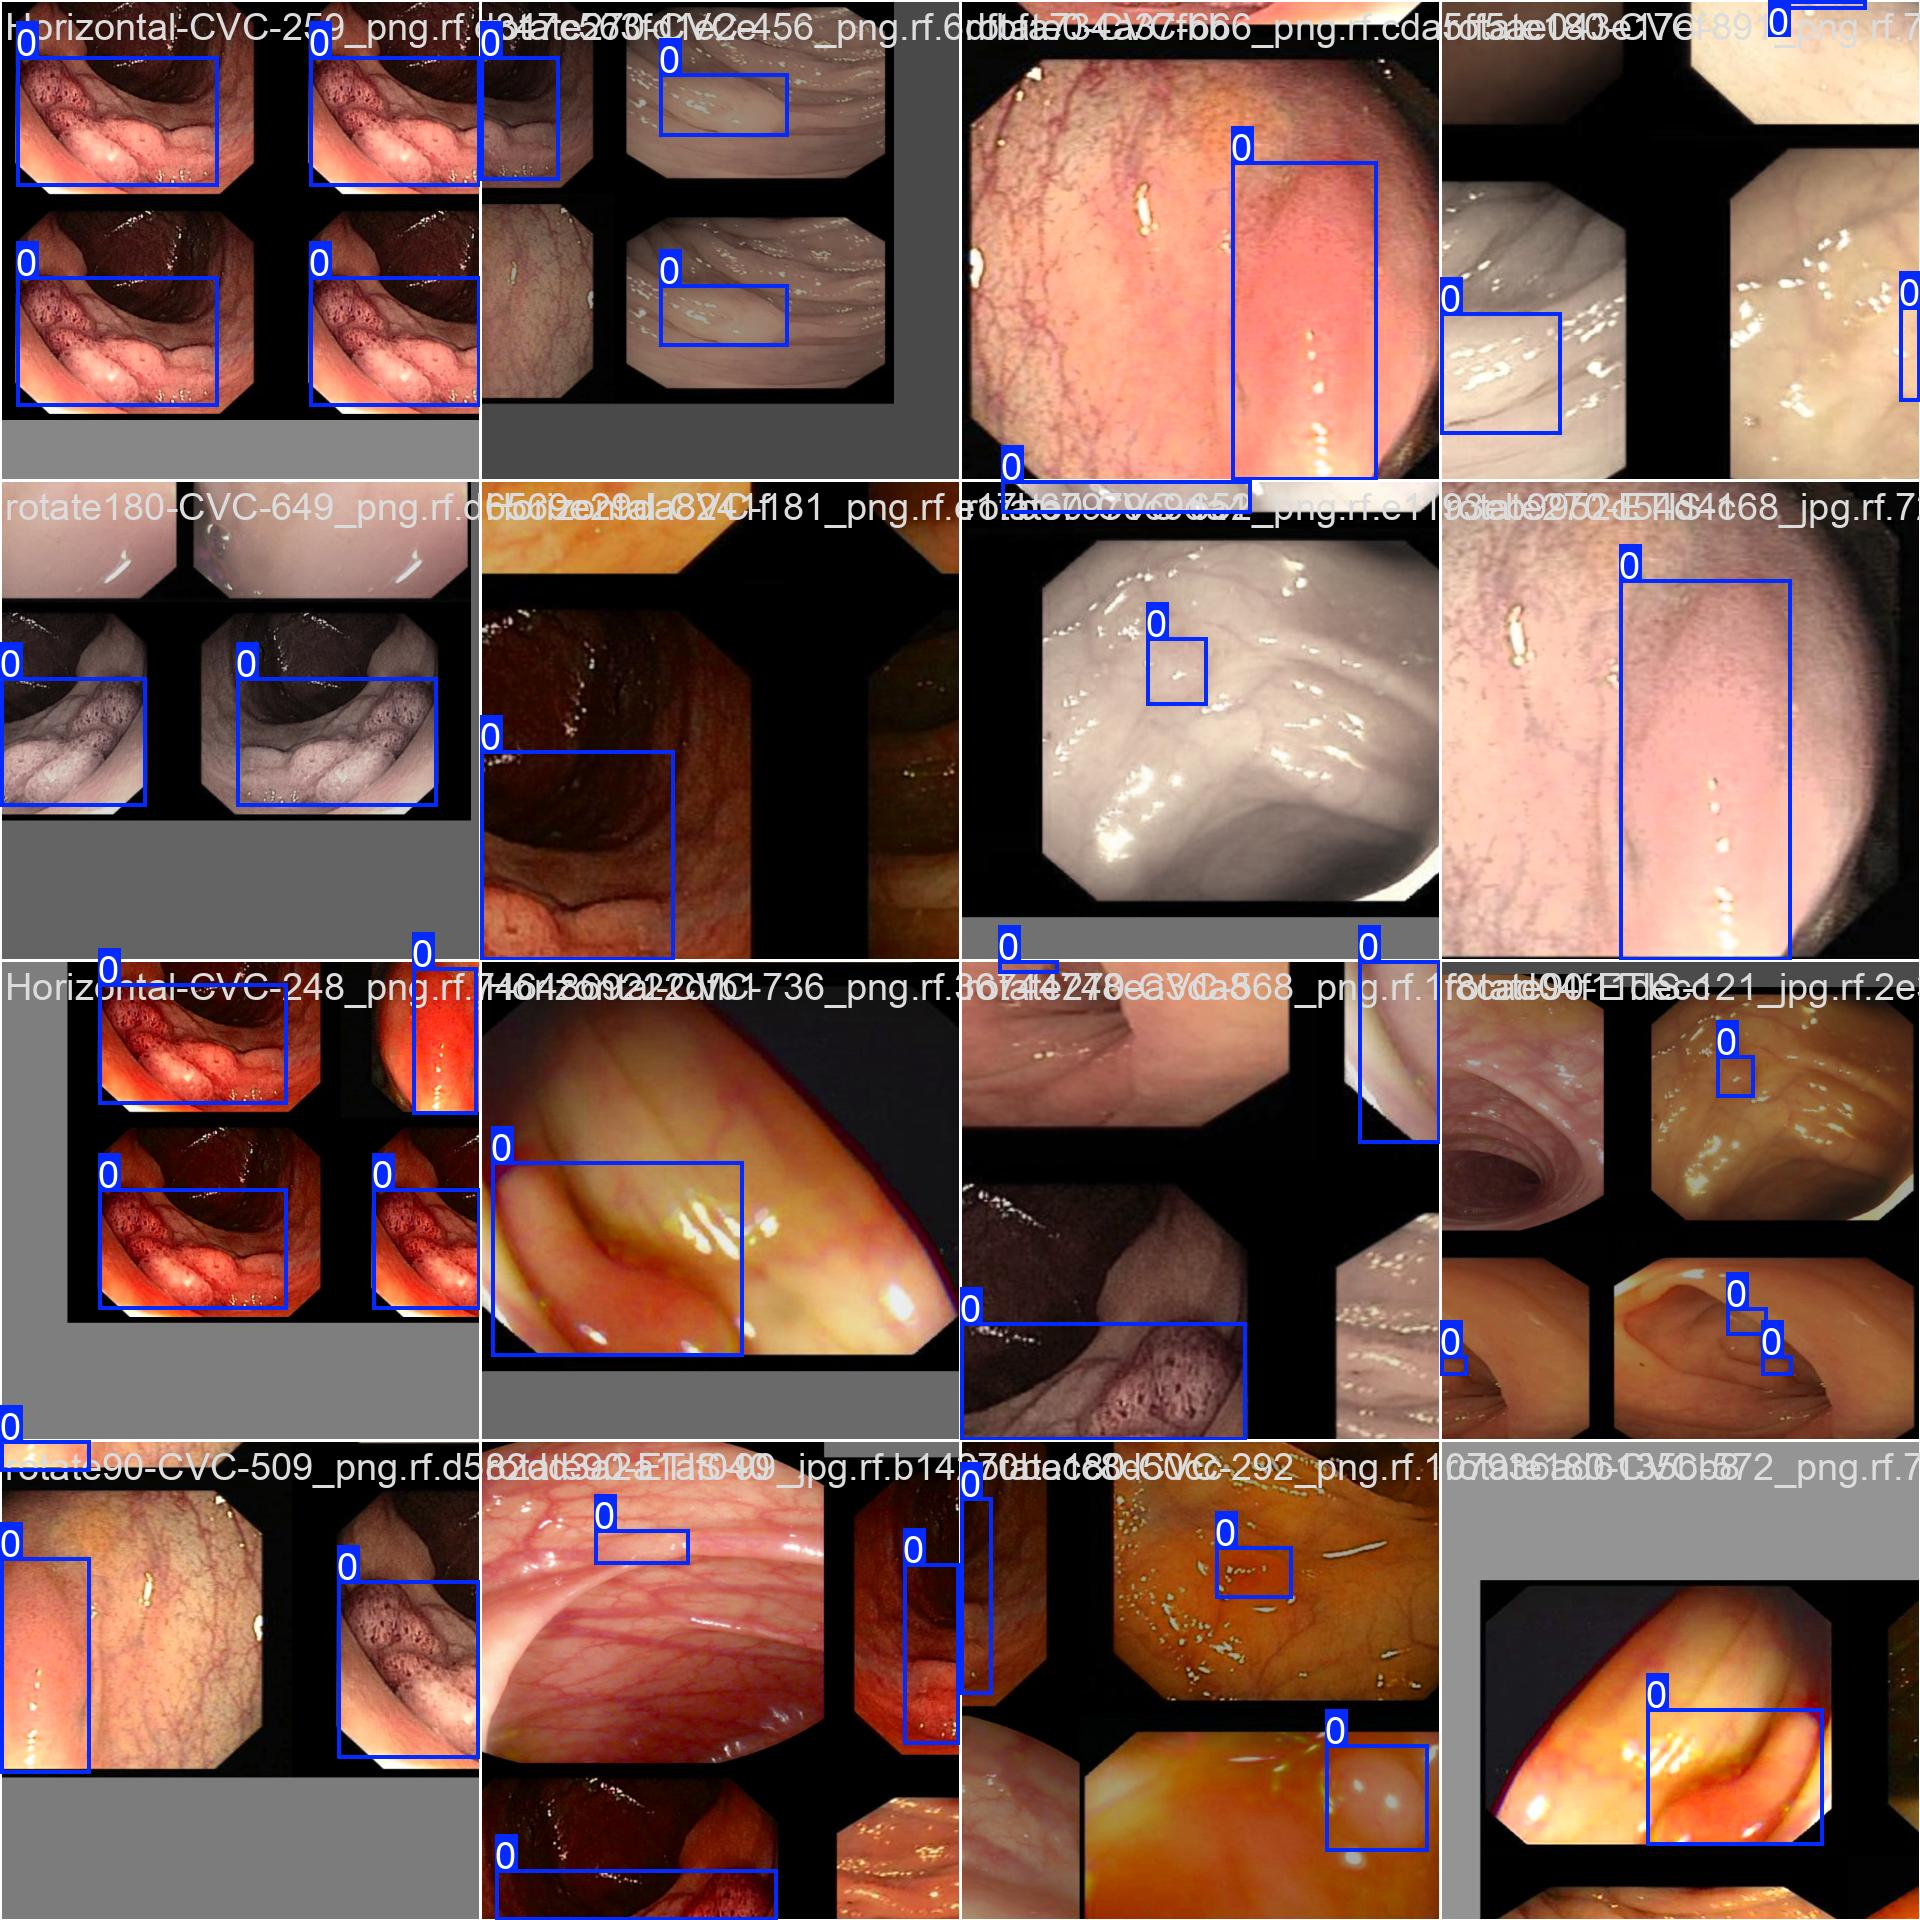

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/train_batch0.jpg", width=1000)

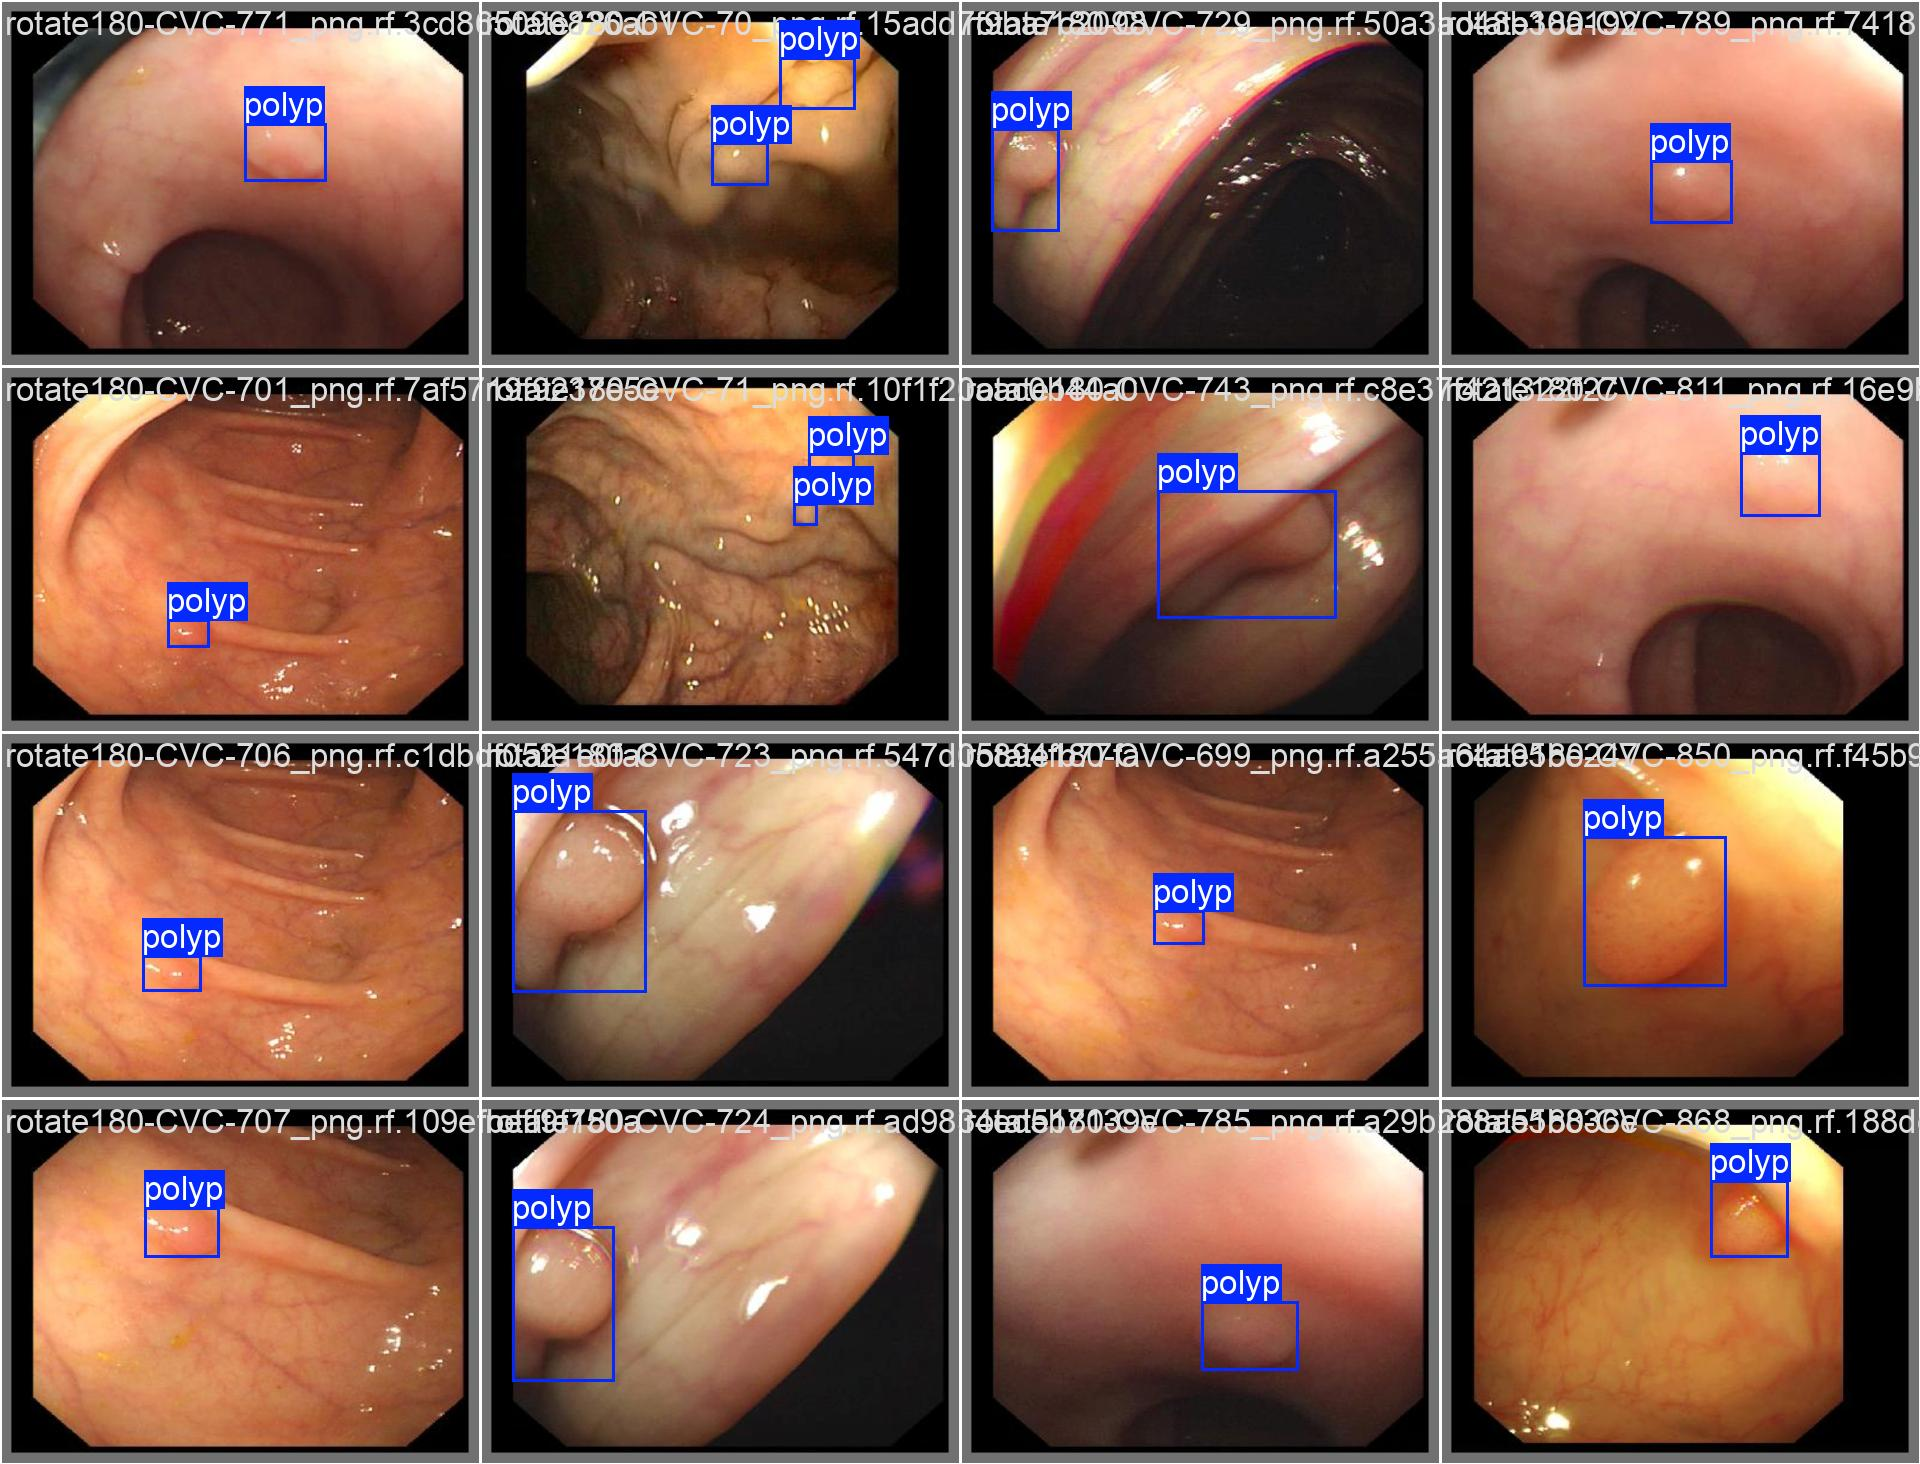

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/val_batch0_labels.jpg", width=1000)

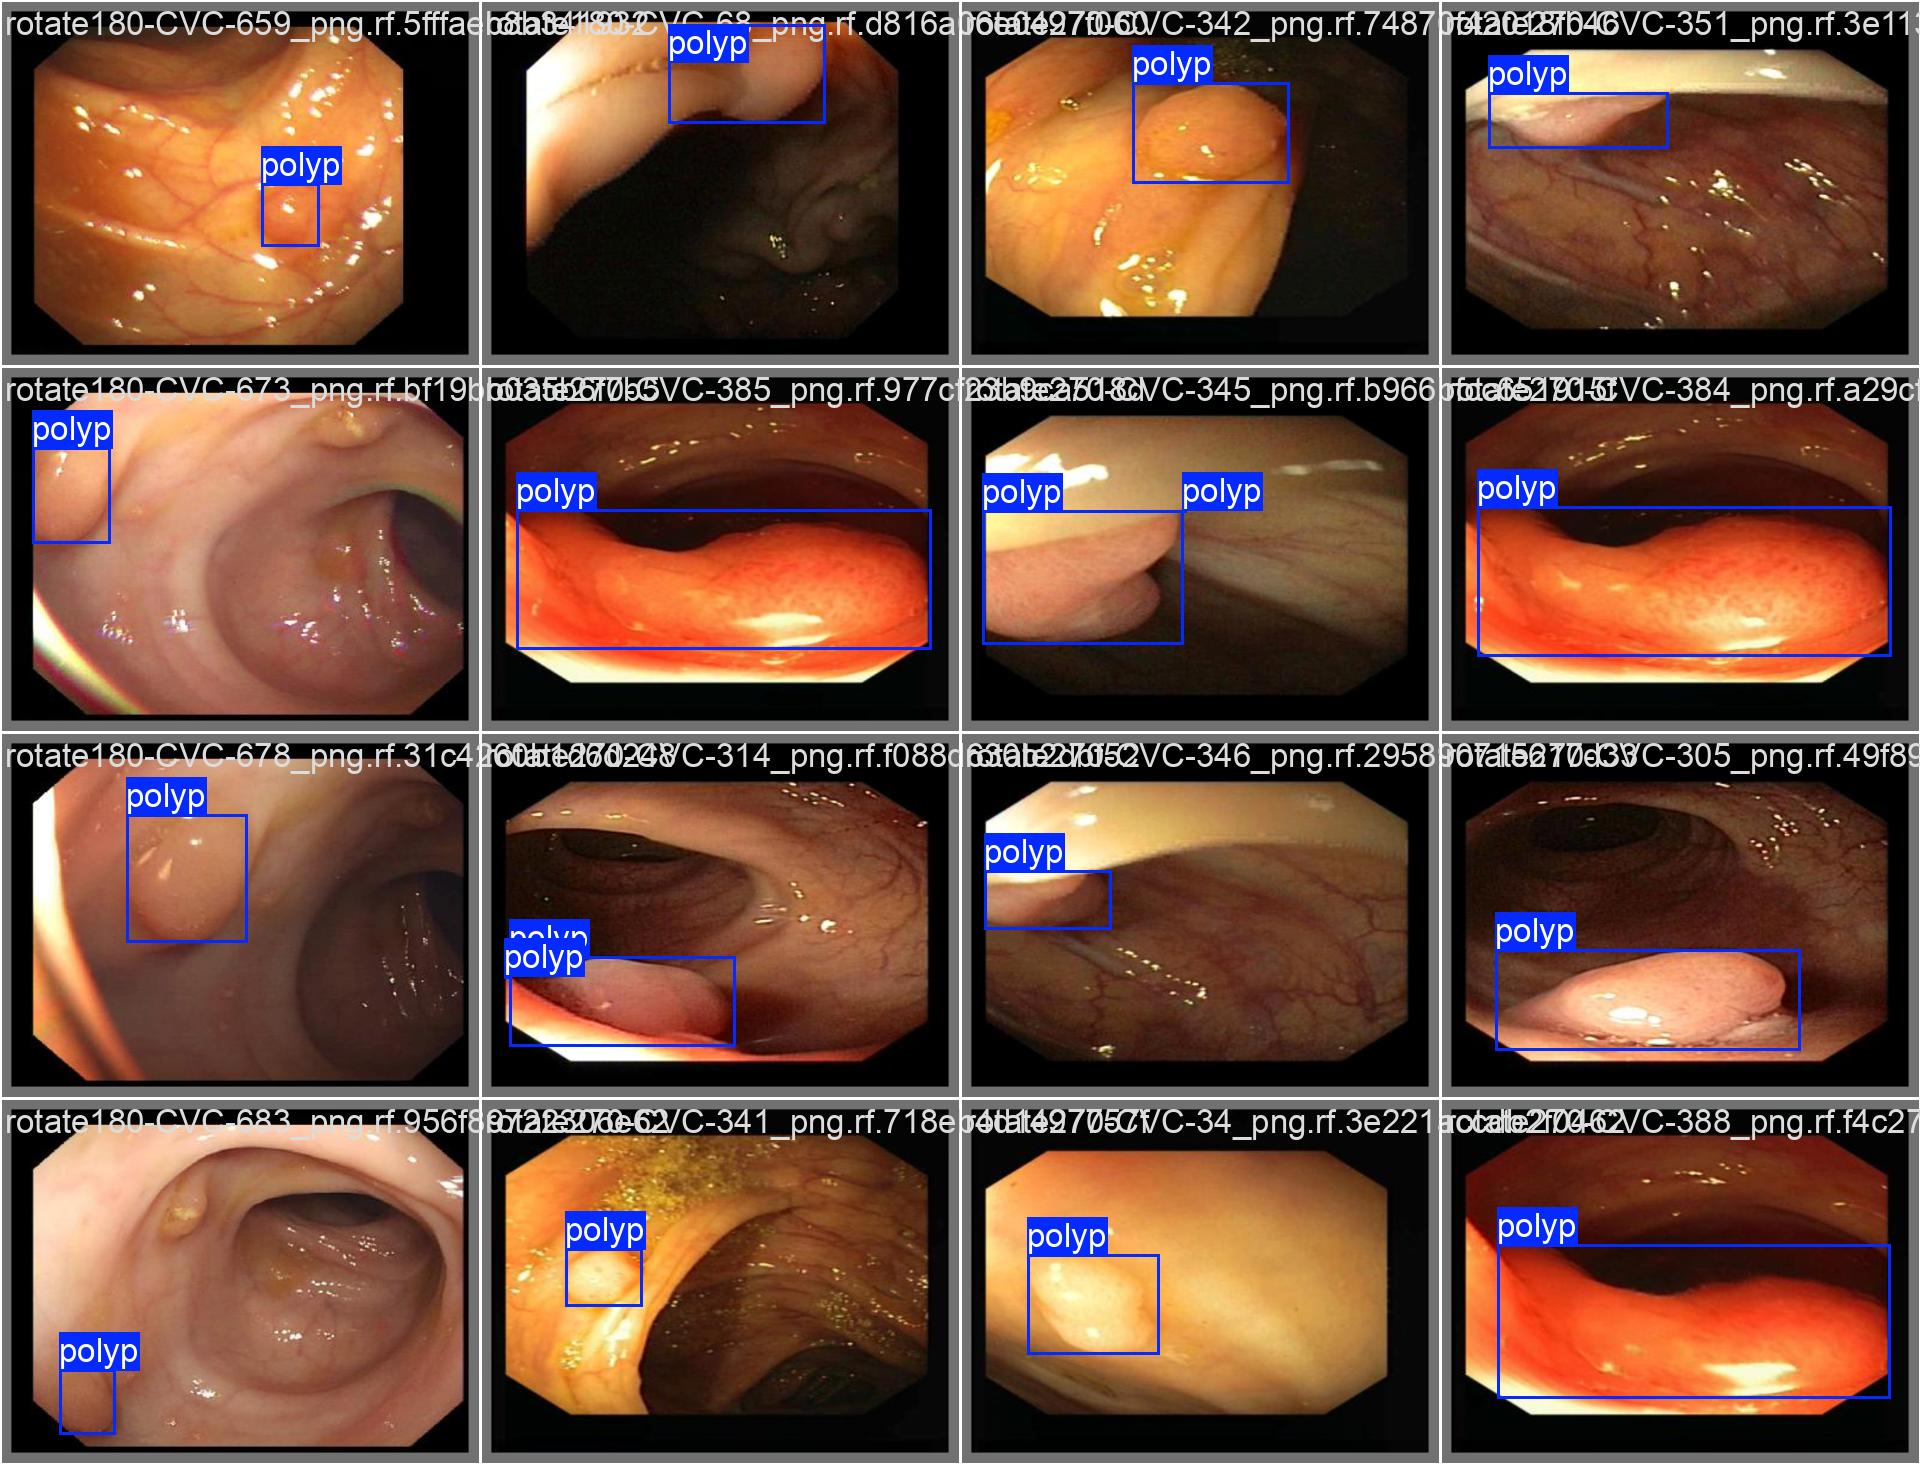

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/val_batch1_labels.jpg", width=1000)

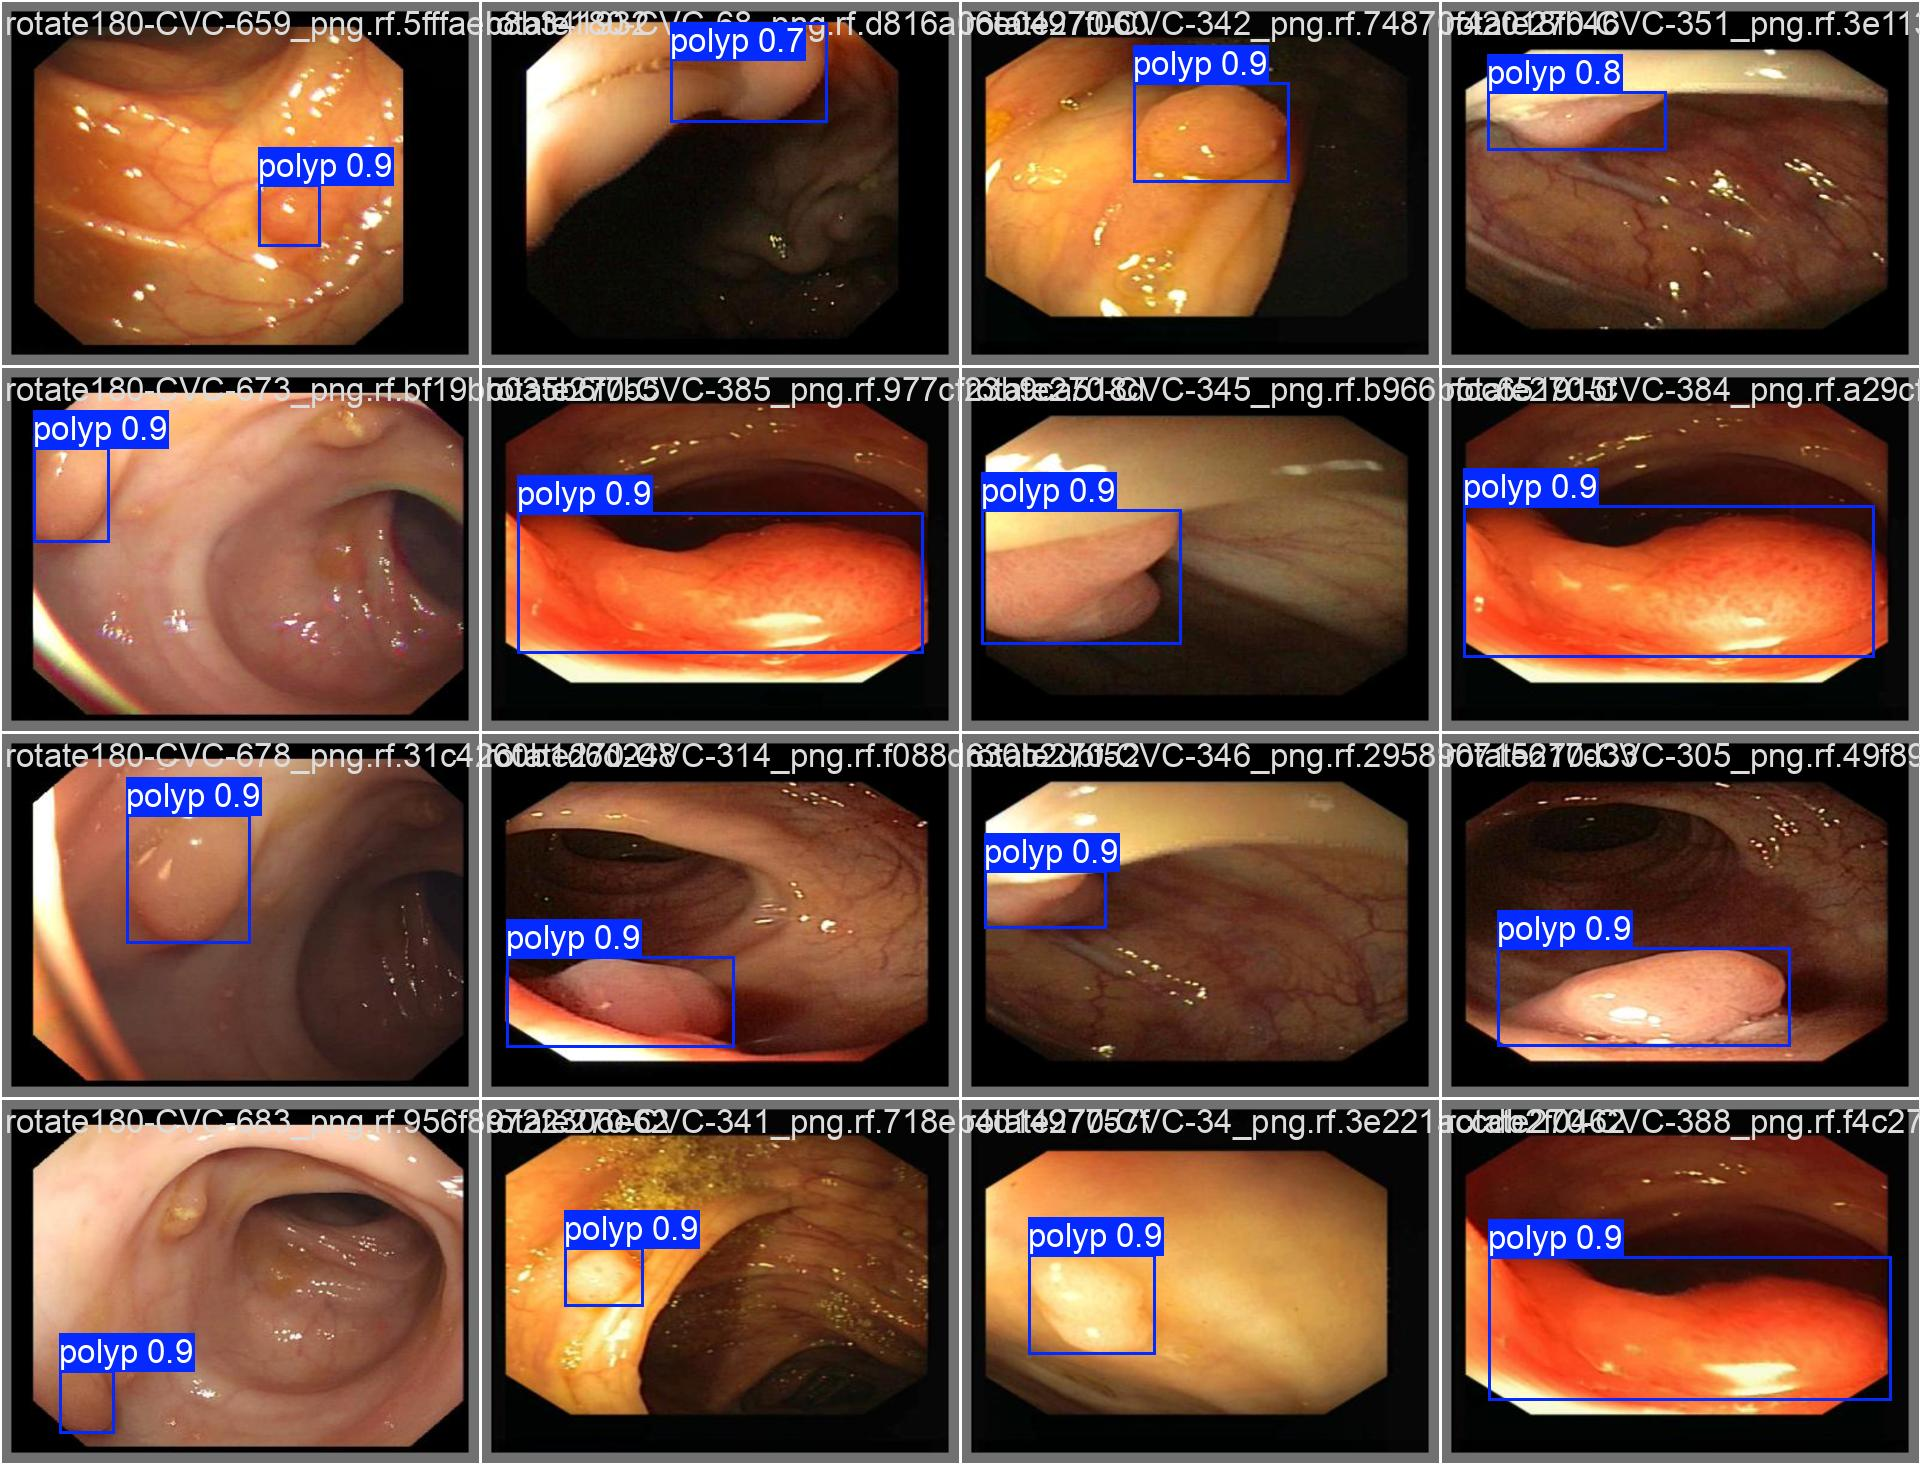

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=1000)

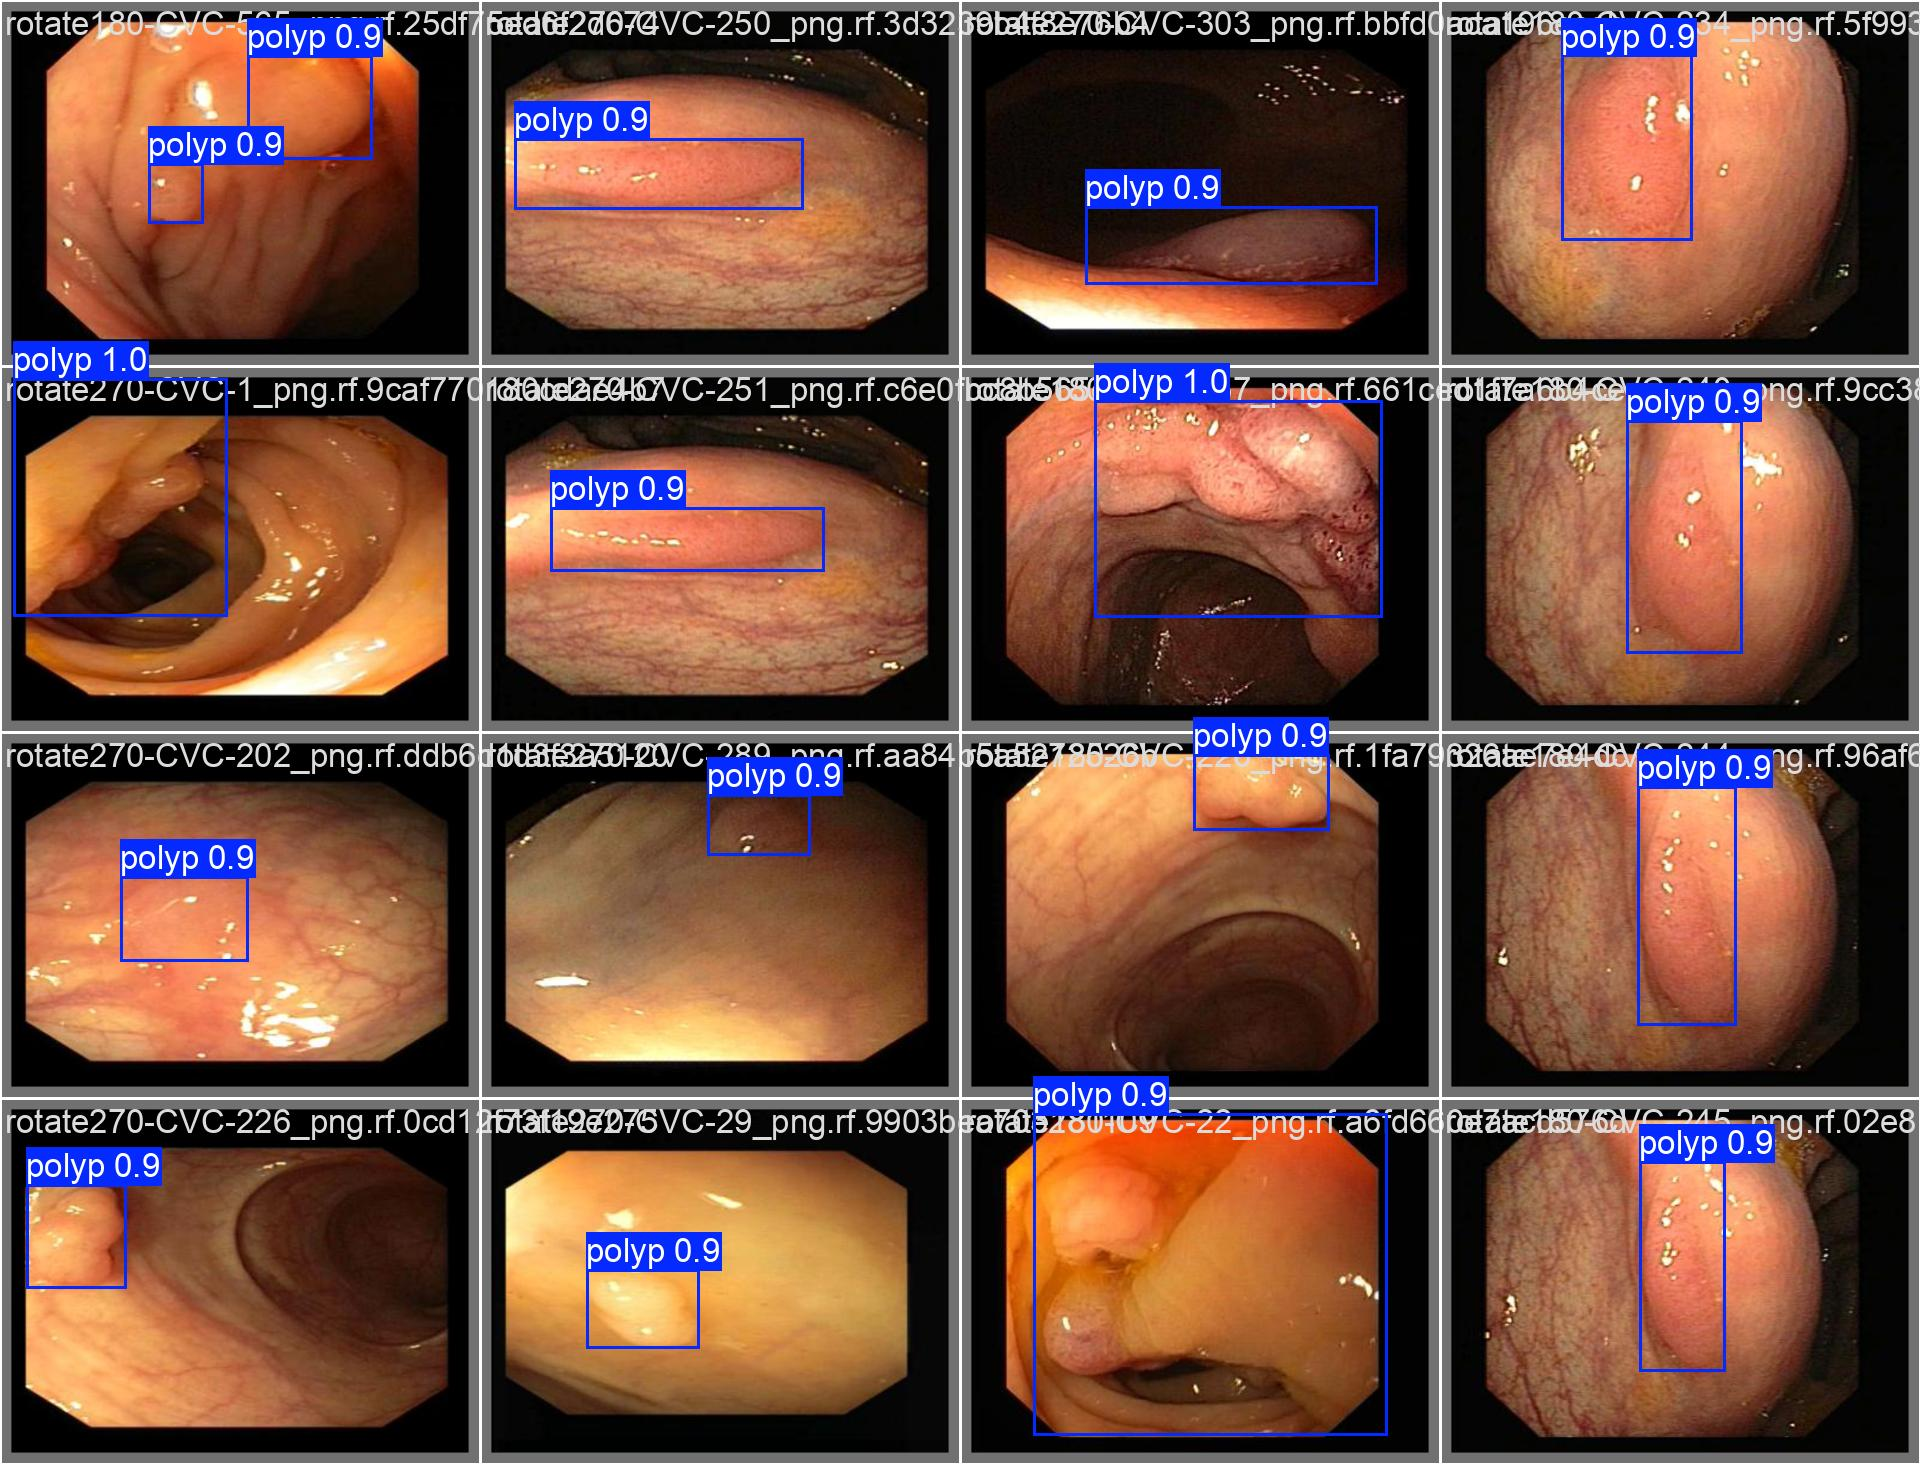

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=1000)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1130.5±757.6 MB/s, size: 31.8 KB)
val: Scanning /content/polyp-3/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 649/649 12.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 6.3it/s 6.5s
                   all        649        679          1      0.982      0.989      0.909
Speed: 1.0ms preprocess, 3.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1312 /content/polyp-3/test/images/Horizontal-CVC-102_png.rf.f5e60e611d8d640d0b71cab867e446a0.jpg: 480x640 1 polyp, 51.4ms
image 2/1312 /content/polyp-3/test/images/Horizontal-CVC-104_png.rf.483d98abcce8ecc28edee48ce347a225.jpg: 480x640 1 polyp, 8.2ms
image 3/1312 /content/polyp-3/test/images/Horizontal-CVC-107_png.rf.6a05b00241082d9f1205b98198da026b.jpg: 480x640 1 polyp, 7.4ms
image 4/1312 /content/polyp-3/test/images/Horizontal-CVC-110_png.rf.9d4ff5f260cd42be8e288403384da12d.jpg: 480x640 1 polyp, 7.3ms
image 5/1312 /content/polyp-3/test/images/Horizontal-CVC-117_png.rf.ab32f370d7017e18ee30622805034327.jpg: 480x640 1 polyp, 7.3ms
image 6/1312 /content/polyp-3/test/images/Horizontal-CVC-11_png.rf.255af1ecada0104025ba37efc188180b.jpg: 480x640 1 polyp, 7.4ms
image 7/1312 /content/polyp-3/test/images/Horizontal-CVC-12

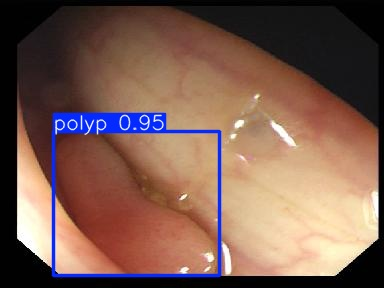

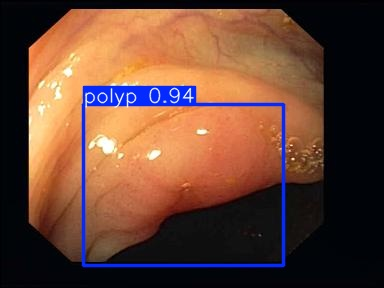

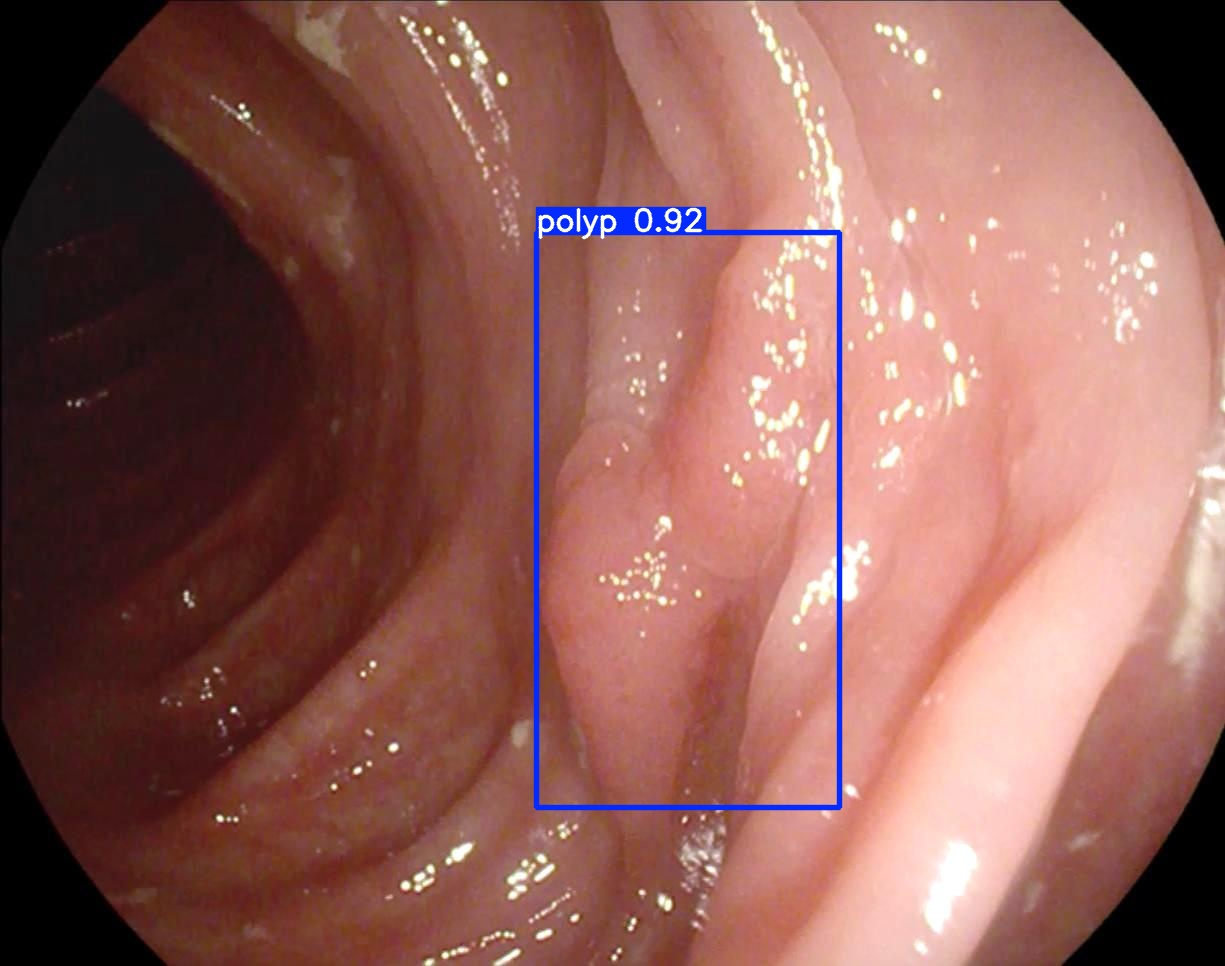

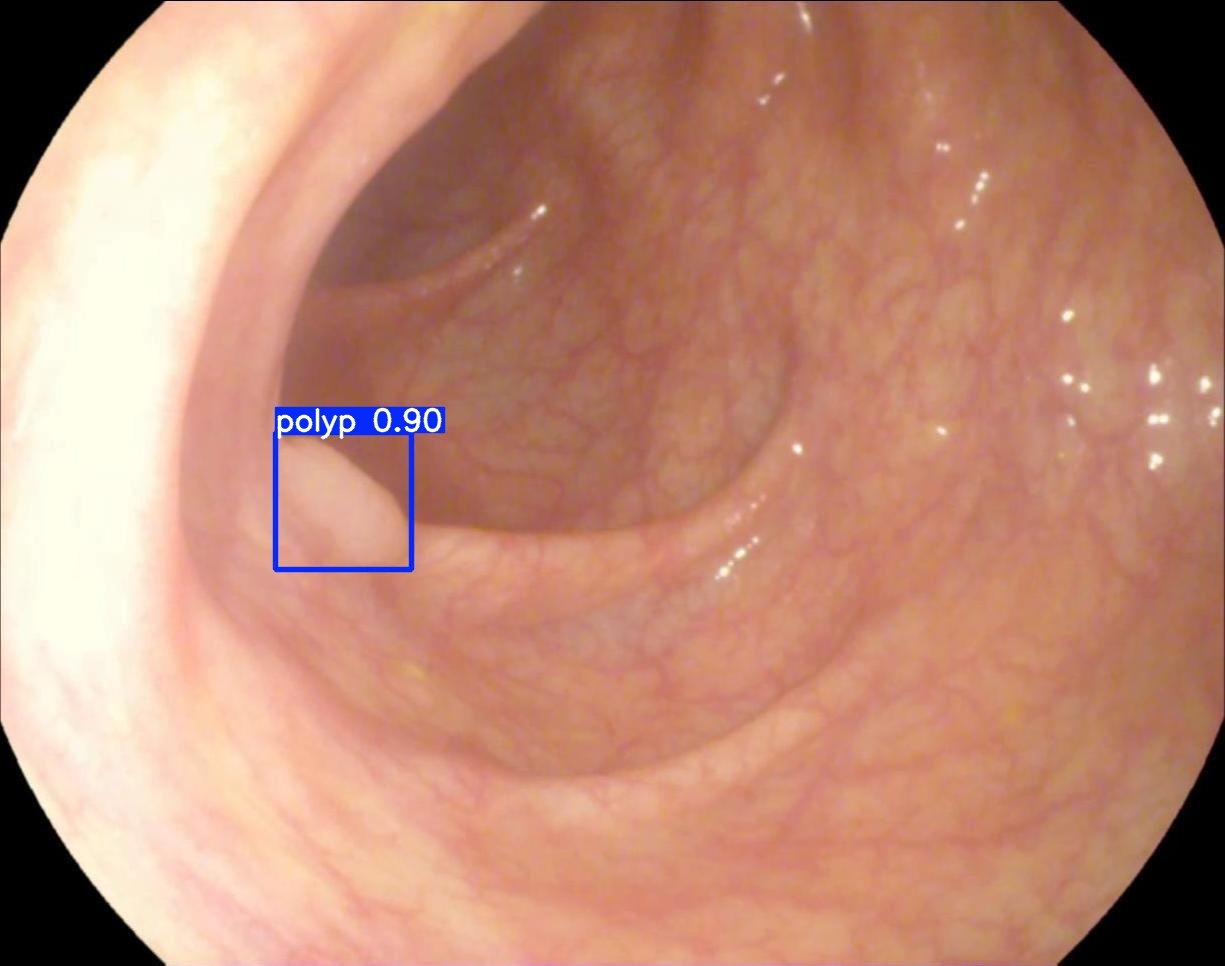

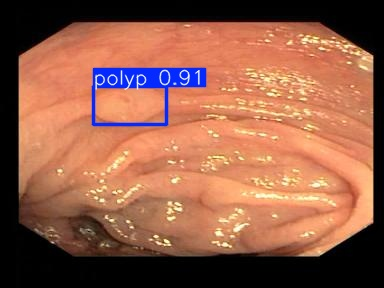

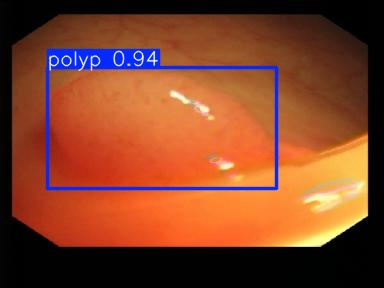

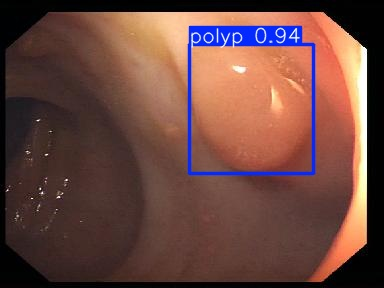

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")